In [9]:
# Basic Imports
import os
import time

In [3]:
# Data manipulation libraries
import numpy as np
import pandas as pd

In [4]:
# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

In [24]:
# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [6]:

# Over Sampling Technique
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [15]:
# ML Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
# XAI Methods
from sklearn.inspection import PartialDependenceDisplay


In [19]:
# Performance Measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [22]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output as cls

In [26]:
def histogram(data_frame, feature_name, title=None, color=None, facet_col=None, showlegend=True):
    if title is None:
        title = f"{feature_name} Histogram"
    if facet_col is not None:
        title = f"{feature_name} vs {facet_col}"
            
    fig = px.histogram(data_frame, x=feature_name, marginal="violin", color=color, title=title, facet_col=facet_col)
    fig.update_layout(
        xaxis_title=feature_name,
        yaxis_title="Frequency Count",
        showlegend=showlegend
    )
    return fig

def pie(data_frame, feature_name, title=None):
    if title is None:
        title = f"{feature_name} Pie Chart"
    fig = px.pie(data_frame, names=feature_name, hole=0.4, title=title)
    return fig


def bar(data_frame, feature_name, title=None, showlegend=False):
    value_counts = data_frame[feature_name].value_counts()
    
    if title is None:
        title = f"{feature_name} Bar Graph"
    
    fig = px.bar(
        x=value_counts.index,
        y=value_counts.values,
        title=title,
        color=value_counts.index,
        text=value_counts.values,
        height=600
    )
    
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(showlegend=showlegend, yaxis_title="Value Counts", xaxis_title=feature_name)
    
    return fig

def bar_compare(data_frame, feature1, feature2):
    fig = px.bar(data_frame.groupby([feature1, feature2]).size().reset_index(name="Count"),
             x=feature1, y="Count", color=feature2, barmode="group", 
             title=f"{feature1} Count by {feature2}", height=600,
             text="Count")

    fig.update_traces(textposition='outside')
    return fig

def scatter(data_frame, feature_1, feature_2, color=None, facet_col=None, title=None):
    fig = px.scatter(
        data_frame, 
        feature_1, 
        feature_2, 
        color=color, 
        facet_col=facet_col, 
        title= f"{feature_1} vs {feature_2}" if title is None else title,
        height=600
    )
    return fig

def box(data_frame, feature_1, feature_2, color=None, facet_col=None, title=None):
    fig = px.box(
        data_frame, 
        feature_1, 
        feature_2, 
        color=color, 
        facet_col=facet_col, 
        title= f"{feature_1} vs {feature_2}" if title is None else title,
        height=600
    )
    return fig

In [27]:
data_path = "data.csv"
# Loading Data
ibm_hr = pd.read_csv(data_path)
# Quick Look
ibm_hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [28]:
# Data Frame Structure
ibm_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
# All Features
features = ibm_hr.columns.to_list()

# Numerical Features
num_features = [feature for feature in features if ibm_hr[feature].dtype != object]

# Categorical Features
cat_features = [feature for feature in features if ibm_hr[feature].dtype == object]

In [30]:
# Categorical features and the Unique Values
for cat in cat_features:
    print(f"Feature: {cat:20}\n\tUnique Values: {ibm_hr[cat].unique()}")

Feature: Attrition           
	Unique Values: ['Yes' 'No']
Feature: BusinessTravel      
	Unique Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Feature: Department          
	Unique Values: ['Sales' 'Research & Development' 'Human Resources']
Feature: EducationField      
	Unique Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Feature: Gender              
	Unique Values: ['Female' 'Male']
Feature: JobRole             
	Unique Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Feature: MaritalStatus       
	Unique Values: ['Single' 'Married' 'Divorced']
Feature: Over18              
	Unique Values: ['Y']
Feature: OverTime            
	Unique Values: ['Yes' 'No']


In [39]:
num_discrete_features, num_continuous_features = [], []
for feature in num_features:
    uniques = ibm_hr[feature].unique()
    if len(uniques)<=10:
        num_discrete_features.append(feature)
    else:
        num_continuous_features.append(feature)

print("Discrete Numeric features:")
for index, f in enumerate(num_discrete_features):
    print(f"{index+1:2}. {f}")

    
print("\nContinuous Numeric features:")
for index, f in enumerate(num_continuous_features):
    print(f"{index+1:2}. {f}")

Discrete Numeric features:
 1. Education
 2. EmployeeCount
 3. EnvironmentSatisfaction
 4. JobInvolvement
 5. JobLevel
 6. JobSatisfaction
 7. NumCompaniesWorked
 8. PerformanceRating
 9. RelationshipSatisfaction
10. StandardHours
11. StockOptionLevel
12. TrainingTimesLastYear
13. WorkLifeBalance

Continuous Numeric features:
 1. Age
 2. DailyRate
 3. DistanceFromHome
 4. EmployeeNumber
 5. HourlyRate
 6. MonthlyIncome
 7. MonthlyRate
 8. PercentSalaryHike
 9. TotalWorkingYears
10. YearsAtCompany
11. YearsInCurrentRole
12. YearsSinceLastPromotion
13. YearsWithCurrManager


In [40]:
print("Discrete Numeric features:")
for index, f in enumerate(num_discrete_features):
    print(f"{index+1:2}. {f:25} -> {list(ibm_hr[f].unique())}")

Discrete Numeric features:
 1. Education                 -> [2, 1, 4, 3, 5]
 2. EmployeeCount             -> [1]
 3. EnvironmentSatisfaction   -> [2, 3, 4, 1]
 4. JobInvolvement            -> [3, 2, 4, 1]
 5. JobLevel                  -> [2, 1, 3, 4, 5]
 6. JobSatisfaction           -> [4, 2, 3, 1]
 7. NumCompaniesWorked        -> [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]
 8. PerformanceRating         -> [3, 4]
 9. RelationshipSatisfaction  -> [1, 4, 2, 3]
10. StandardHours             -> [80]
11. StockOptionLevel          -> [0, 1, 3, 2]
12. TrainingTimesLastYear     -> [0, 3, 2, 5, 1, 4, 6]
13. WorkLifeBalance           -> [1, 3, 2, 4]


In [41]:
# Checking Null Value Count
ibm_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [42]:
ibm_hr.duplicated().sum()

0

In [43]:
# Create a copy of the original DataFrame to apply transformations
ibm_processed = ibm_hr.copy()

# List of categorical features to be encoded using Label Encoding
cat_le = ['Attrition', 'Gender', 'MaritalStatus', 'Over18', 'OverTime']

# Iterate over each categorical feature to apply Label Encoding
for feature in cat_le:
    
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit the encoder on the feature and transform the feature values
    ibm_processed[feature] = label_encoder.fit_transform(ibm_processed[feature])
    
    # Print information about the encoding for each feature
    print(f"\n{feature}:")
    print(f"\tClasses  : {list(label_encoder.classes_)}")
    print(f"\tEncoding : {label_encoder.transform(label_encoder.classes_)}")


Attrition:
	Classes  : ['No', 'Yes']
	Encoding : [0 1]

Gender:
	Classes  : ['Female', 'Male']
	Encoding : [0 1]

MaritalStatus:
	Classes  : ['Divorced', 'Married', 'Single']
	Encoding : [0 1 2]

Over18:
	Classes  : ['Y']
	Encoding : [0]

OverTime:
	Classes  : ['No', 'Yes']
	Encoding : [0 1]


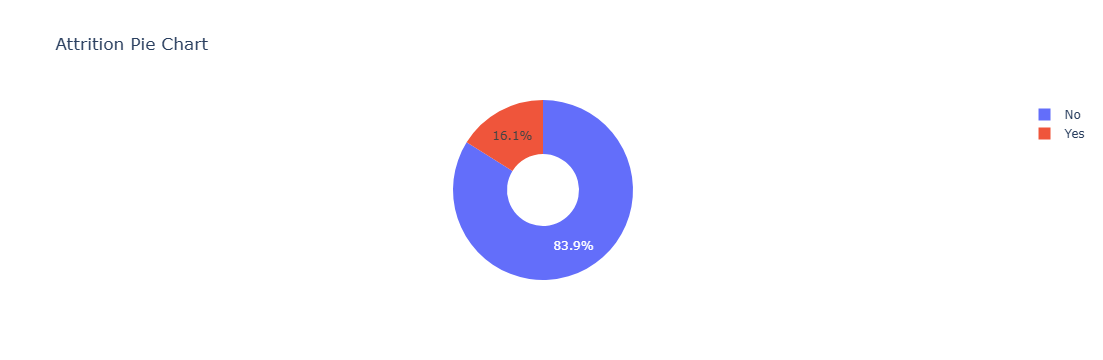

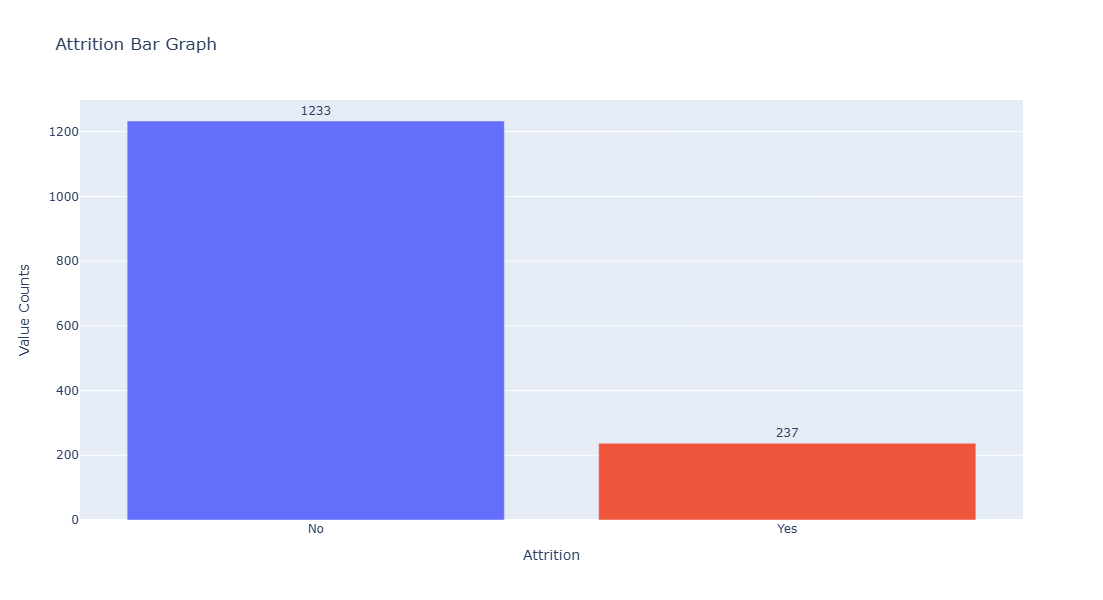

In [46]:
feature = "Attrition"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

In [47]:
null_error = ibm_hr.groupby("Attrition").size()["Yes"]/ibm_hr.shape[0]
print(f"No Information Rate: {null_error:.2%}")

No Information Rate: 16.12%


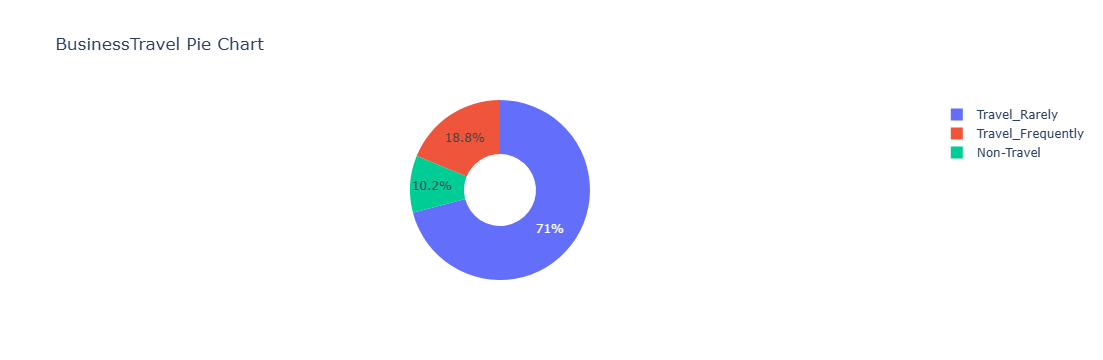

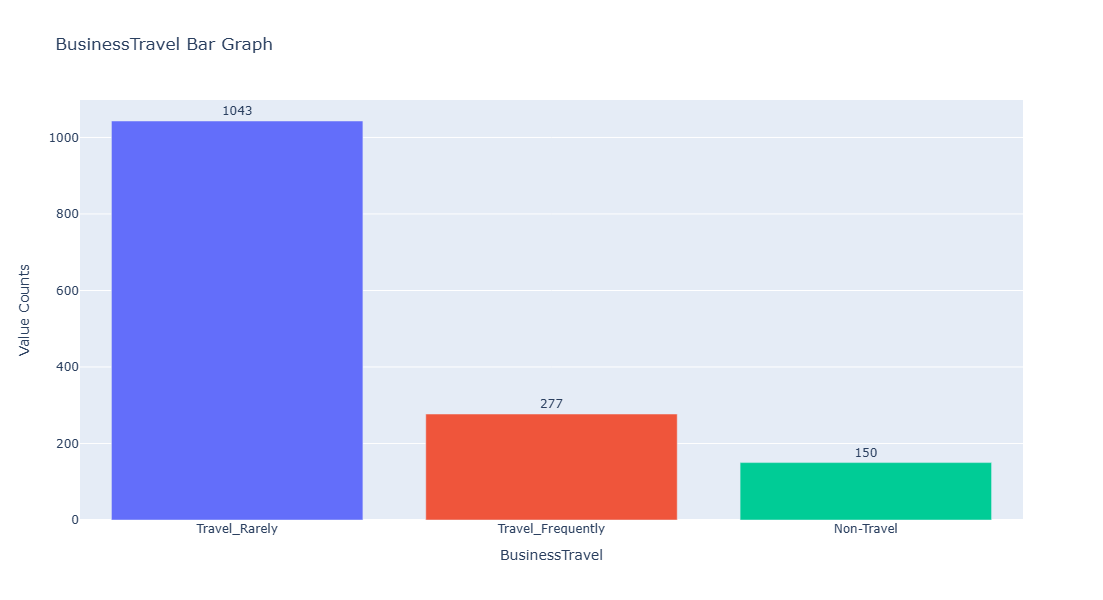

In [48]:
feature = "BusinessTravel"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

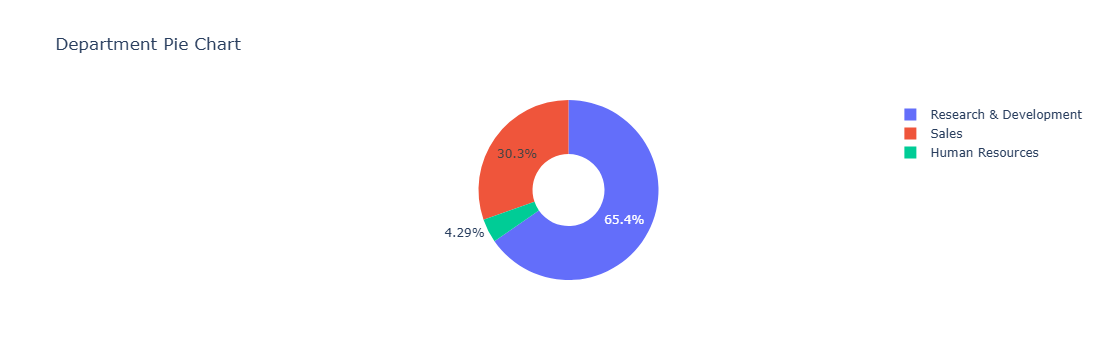

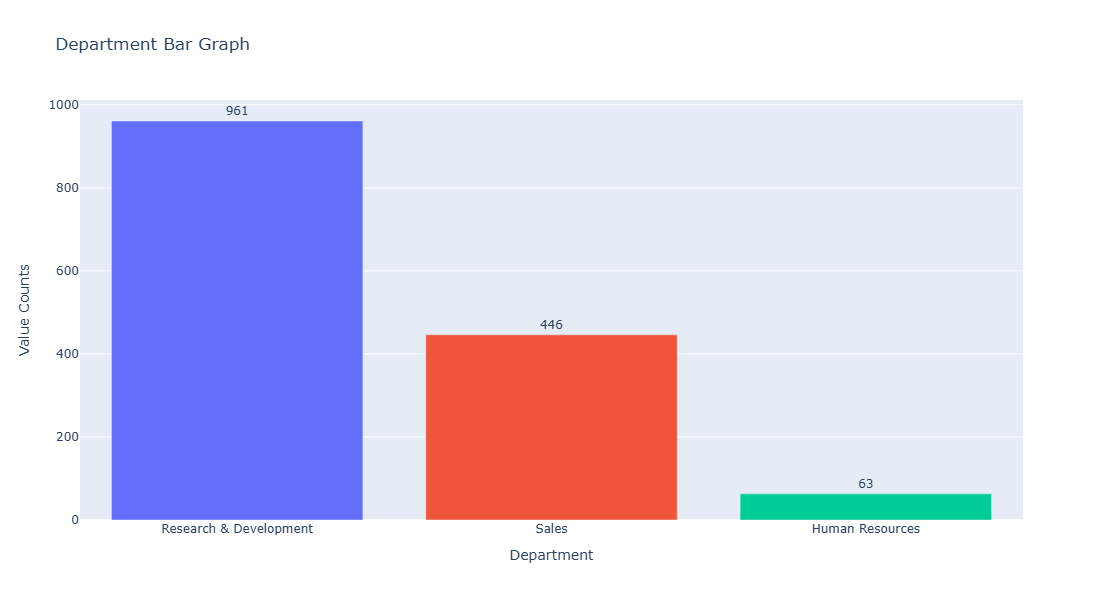

In [49]:
feature = "Department"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

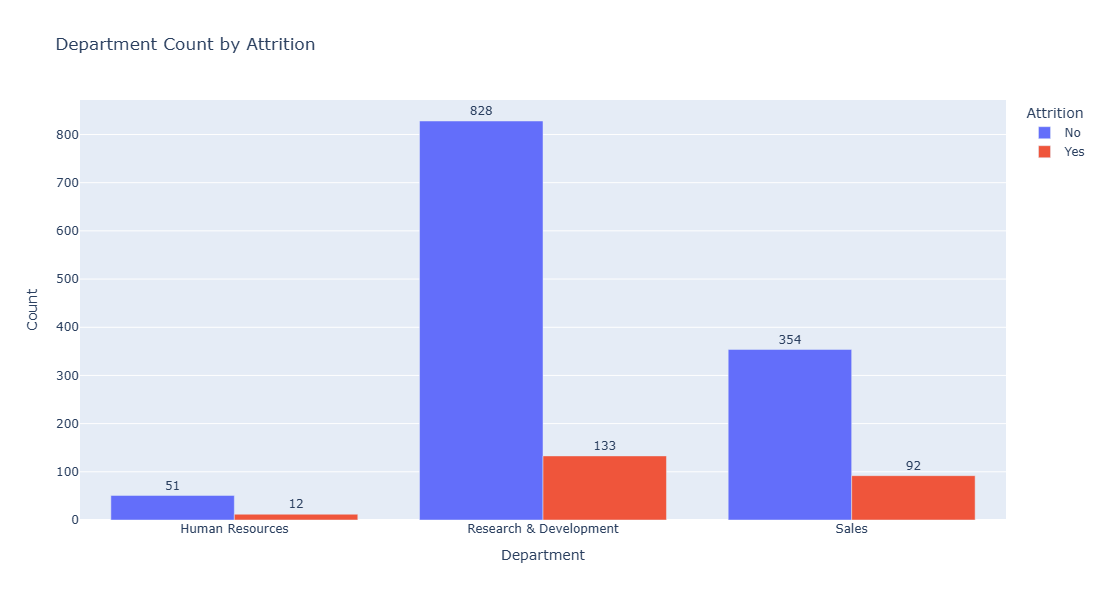

In [50]:
bar_compare(ibm_hr, "Department", "Attrition")

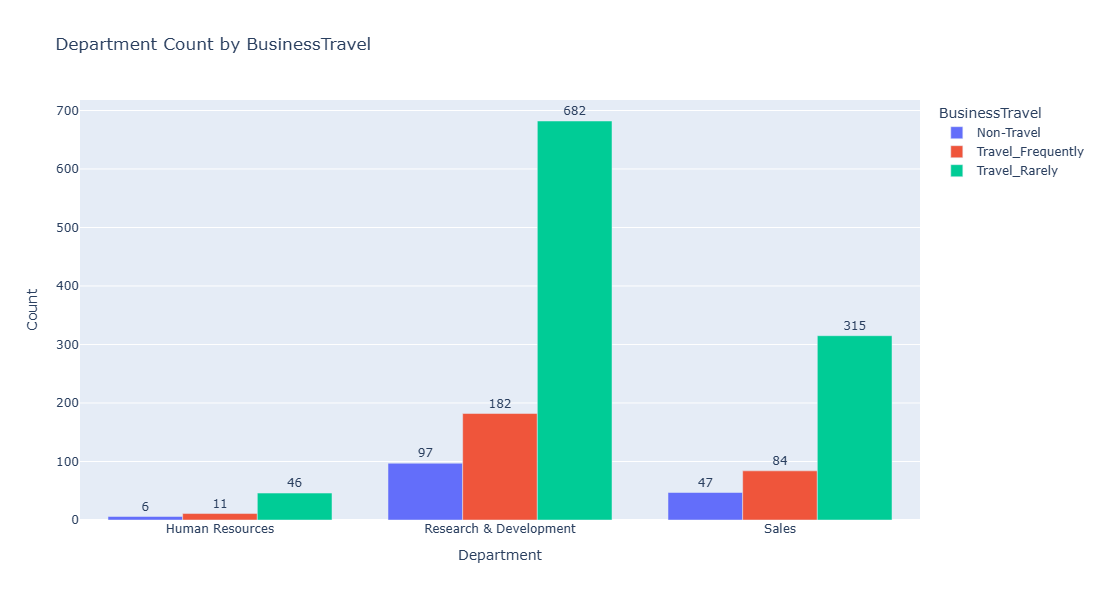

In [51]:
bar_compare(ibm_hr, "Department", "BusinessTravel")

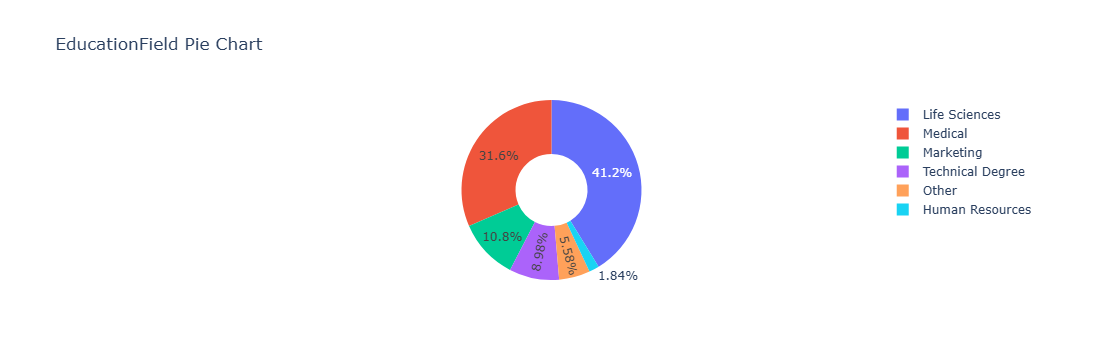

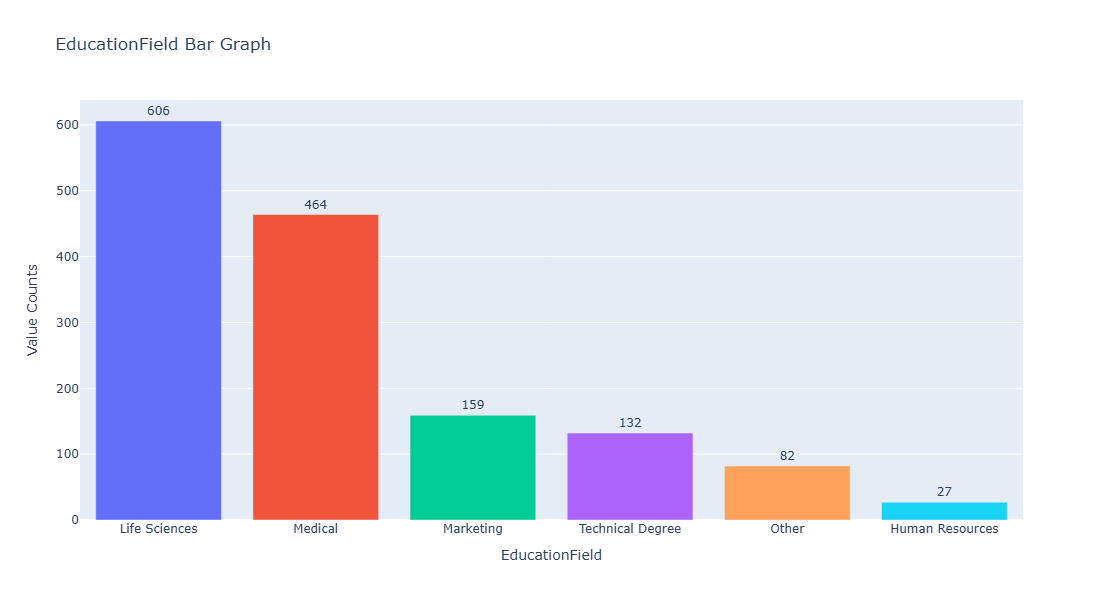

In [52]:
feature = "EducationField"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

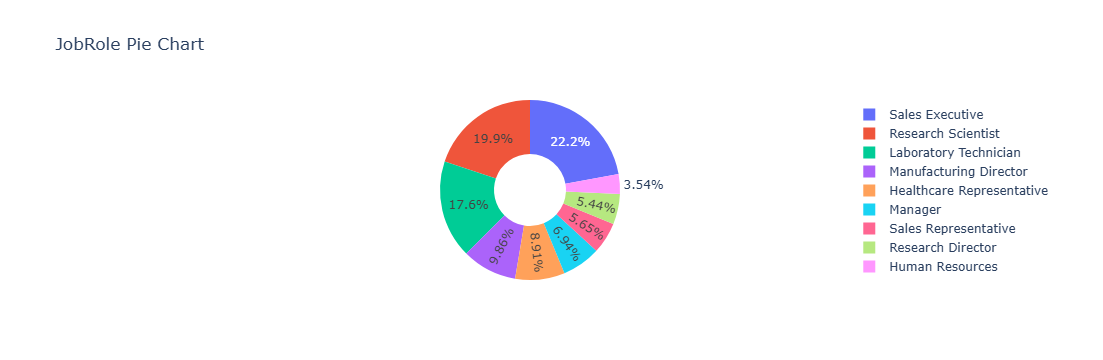

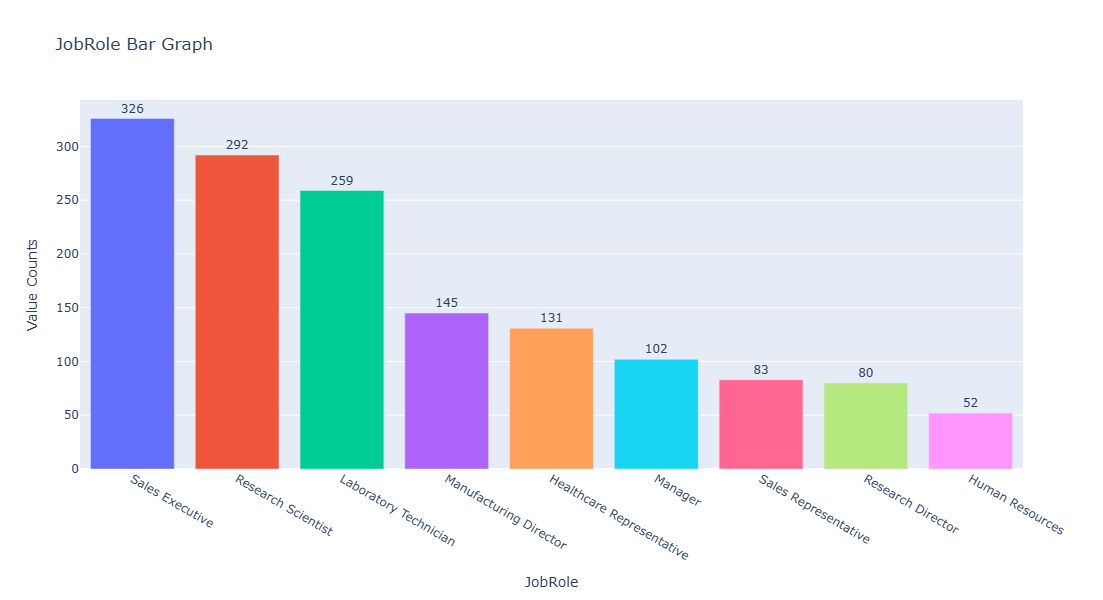

In [53]:
feature = "JobRole"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

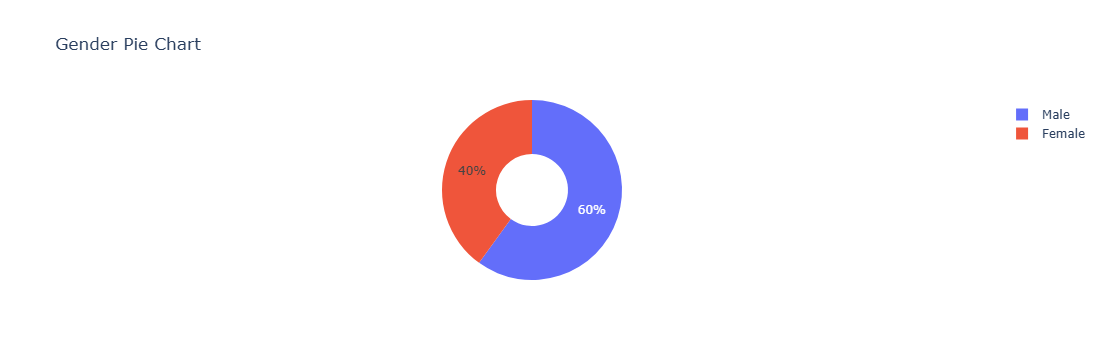

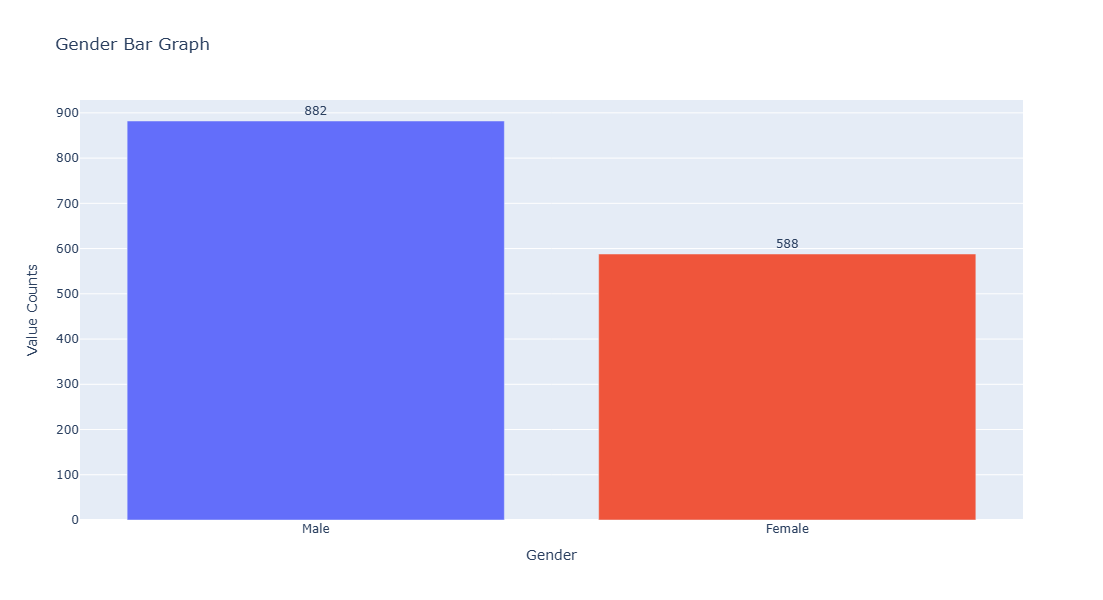

In [54]:
feature = "Gender"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

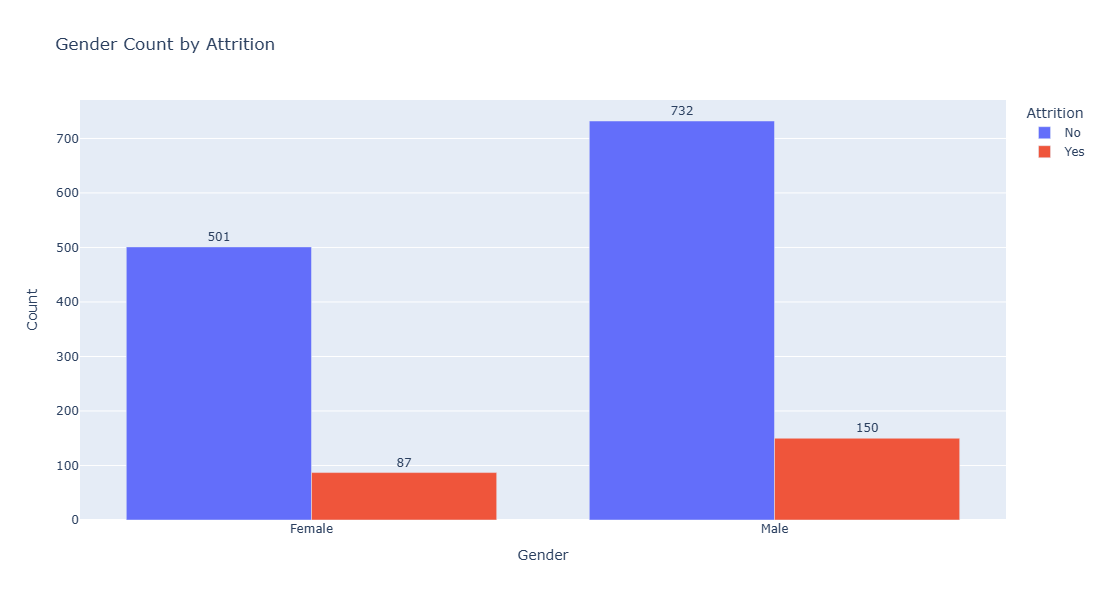

In [55]:
bar_compare(ibm_hr, "Gender", "Attrition")

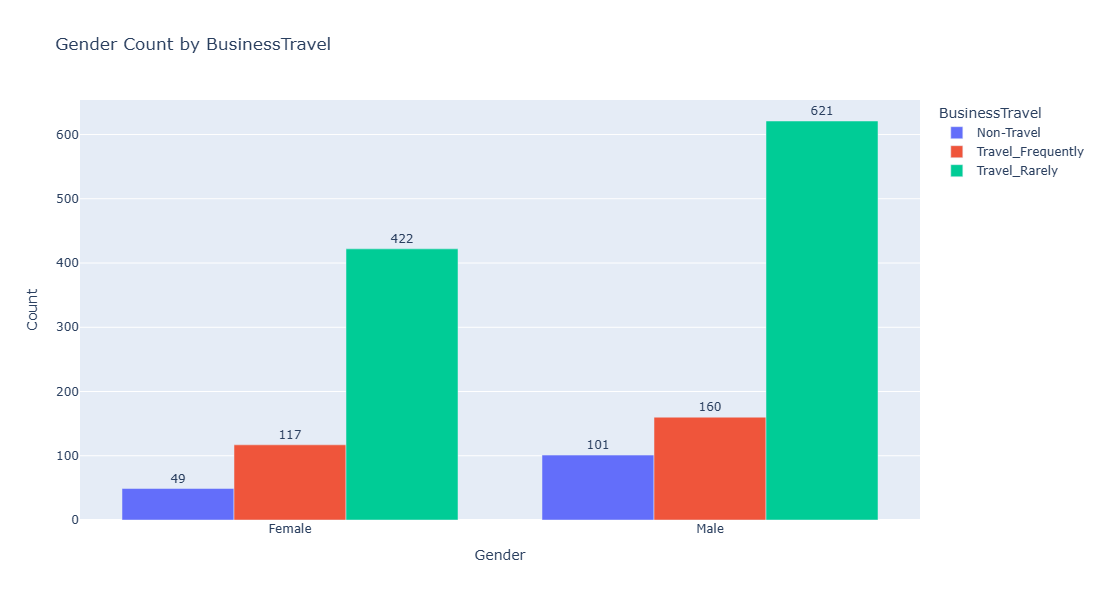

In [56]:
bar_compare(ibm_hr, "Gender", "BusinessTravel")

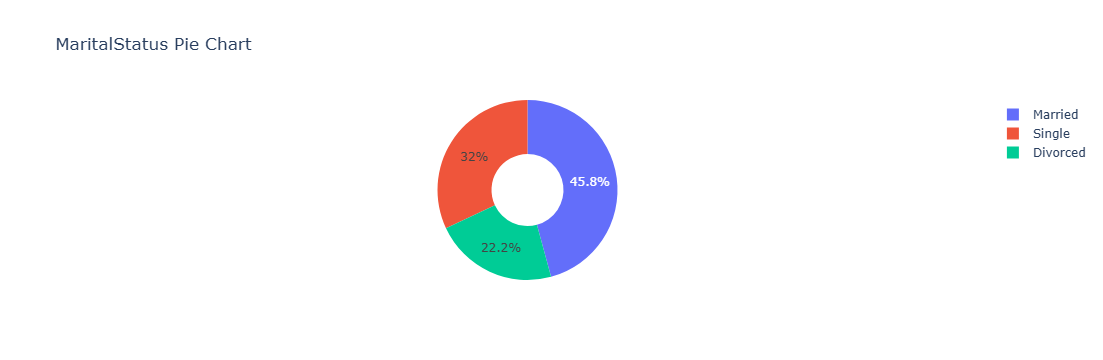

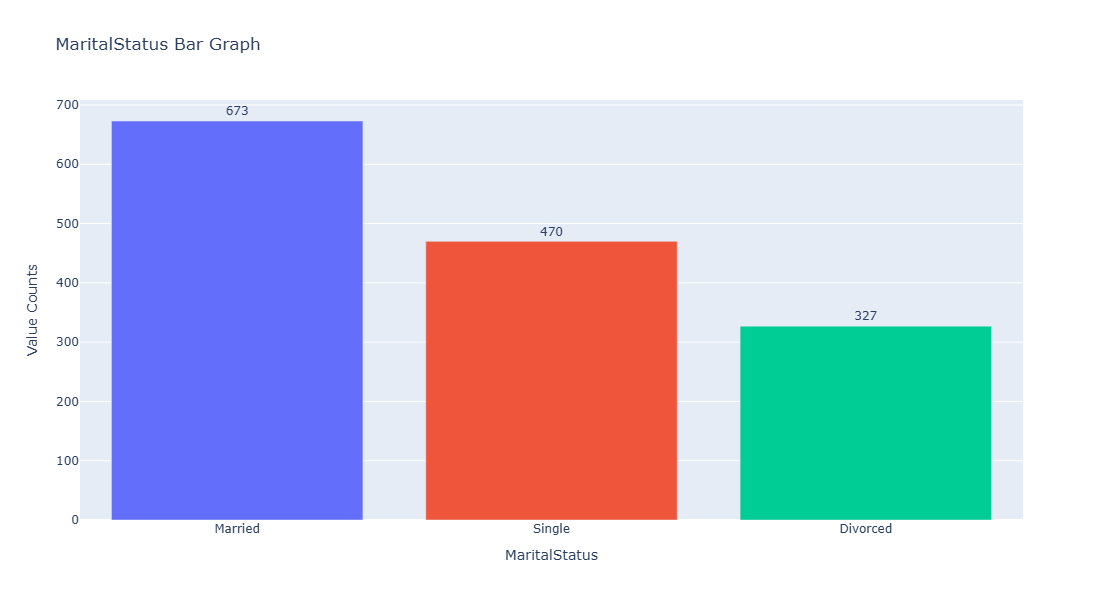

In [57]:
feature = "MaritalStatus"
pie(ibm_hr, feature).show()
bar(ibm_hr, feature).show()

In [58]:
num_continuous_features.remove('EmployeeNumber')
ibm_desc = ibm_processed.describe()[num_continuous_features]
ibm_desc

Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1470.000000  1470.000000       1470.000000  1470.000000    1470.000000   
mean     36.923810   802.485714          9.192517    65.891156    6502.931293   
std       9.135373   403.509100          8.106864    20.329428    4707.956783   
min      18.000000   102.000000          1.000000    30.000000    1009.000000   
25%      30.000000   465.000000          2.000000    48.000000    2911.000000   
50%      36.000000   802.000000          7.000000    66.000000    4919.000000   
75%      43.000000  1157.000000         14.000000    83.750000    8379.000000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
count   1470.000000        1470.000000        1470.000000     1470.000000   
mean   14313.103401          15.209524          11.279592        7.008163   
std     7117.786044           3.659938           7.780782        6.126525   
min     2094.000000          11.000000           0.000000        0.000000   
25%     8047.000000          12.000000           6.000000        3.000000   
50%    14235.500000          14.000000          10.000000        5.000000   
75%    20461.500000          18.000000          15.000000        9.000000   
max    26999.000000          25.000000          40.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

In [59]:
ibm_desc['Age']

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

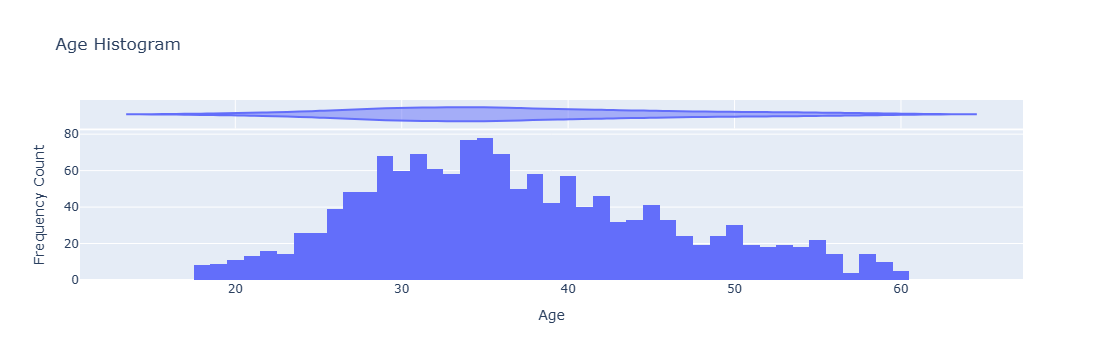

In [60]:
histogram(ibm_processed, "Age")

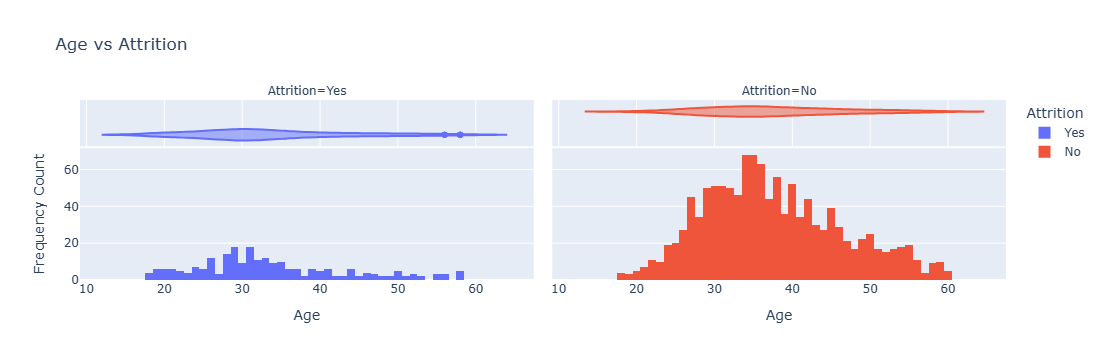

In [61]:
histogram(ibm_hr, "Age", color="Attrition", facet_col="Attrition")

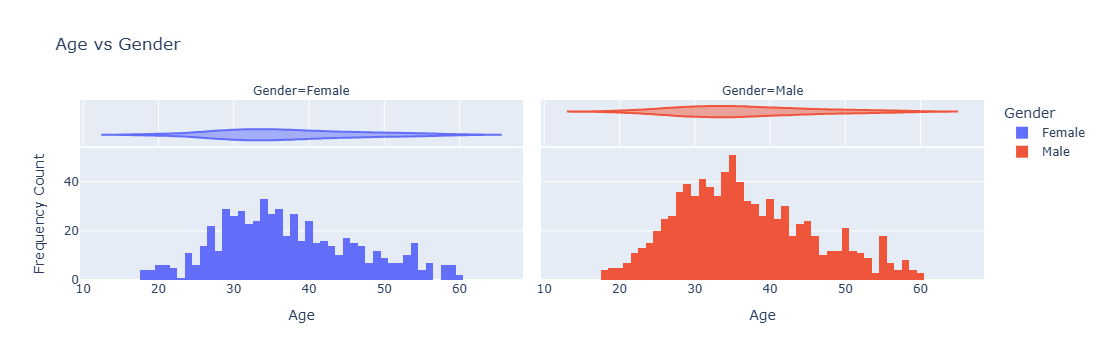

In [62]:
histogram(ibm_hr, "Age", color="Gender", facet_col="Gender")

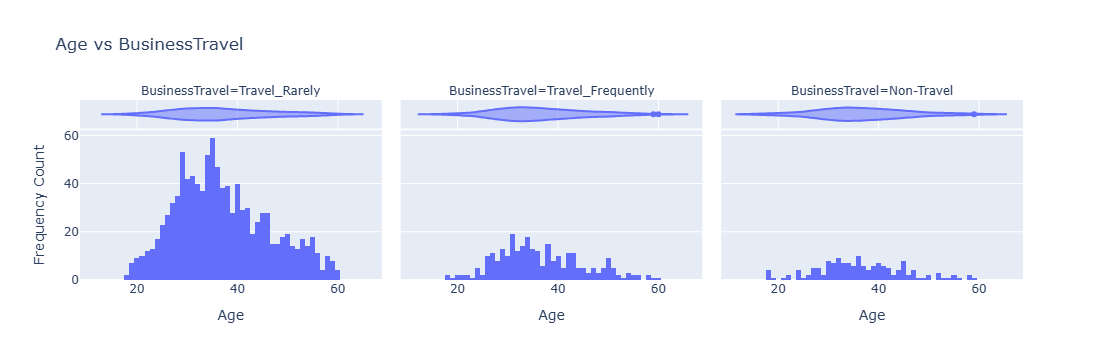

In [63]:
histogram(ibm_hr, "Age", facet_col="BusinessTravel")

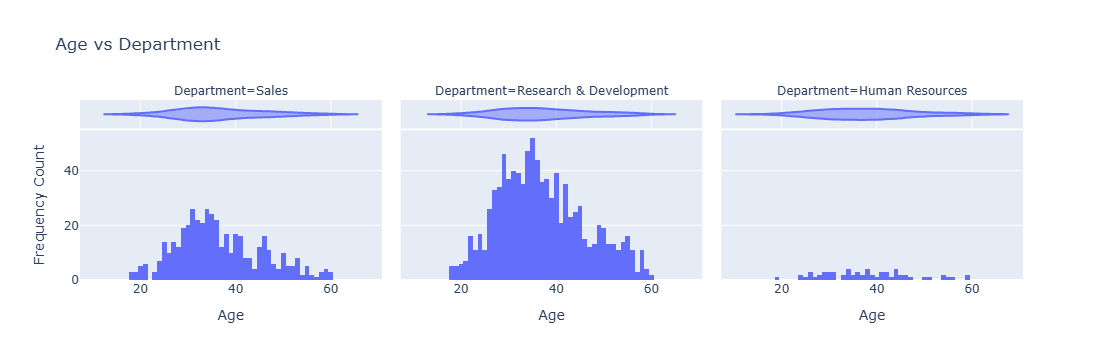

In [64]:
histogram(ibm_hr, "Age", facet_col="Department")

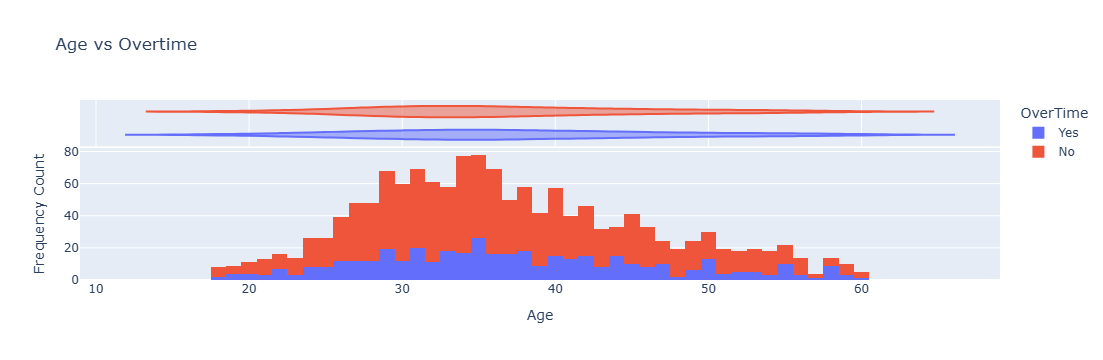

In [65]:
histogram(ibm_hr, "Age", color="OverTime", title="Age vs Overtime")

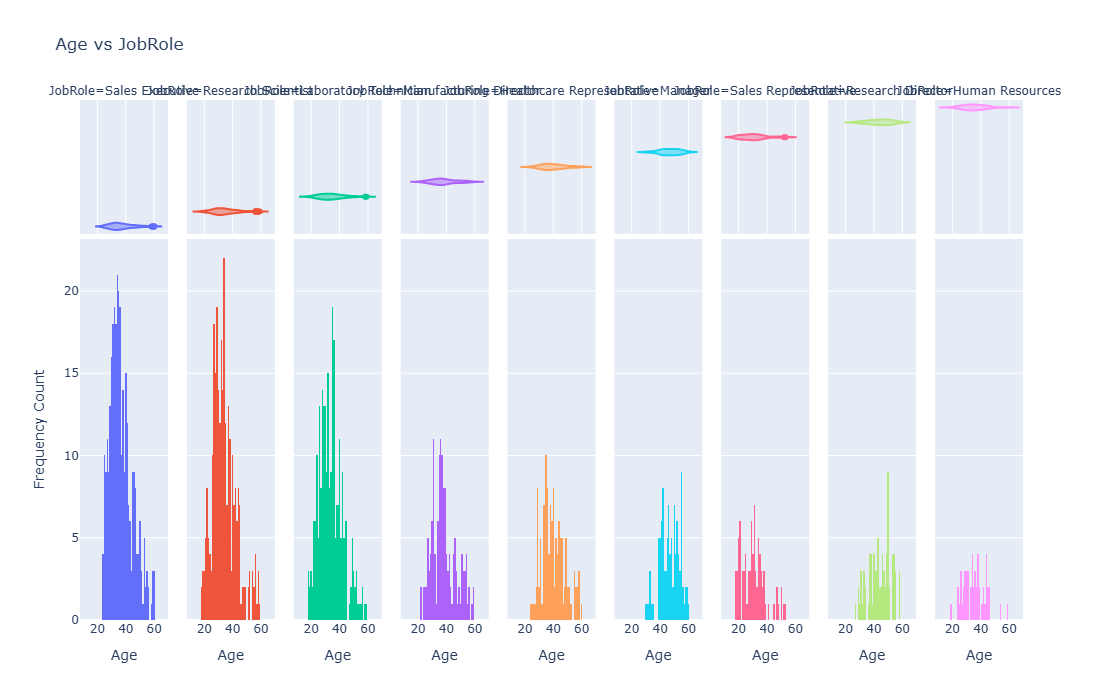

In [66]:
fig = histogram(ibm_hr, "Age", color="JobRole", facet_col="JobRole", showlegend=False)
fig.update_layout(height=700)
fig.show()

In [67]:
ibm_desc['DistanceFromHome']

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

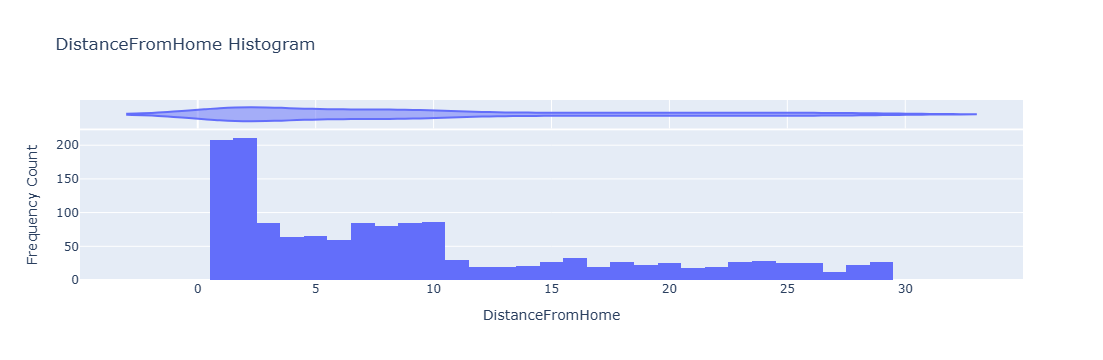

In [68]:
histogram(ibm_processed, "DistanceFromHome")

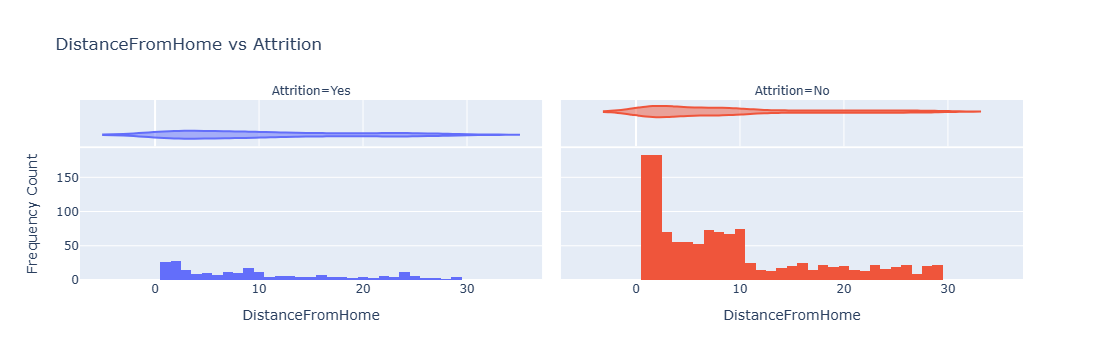

In [69]:
histogram(ibm_hr, "DistanceFromHome", color="Attrition", facet_col="Attrition", showlegend=False)

In [70]:
ibm_desc['DailyRate']

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

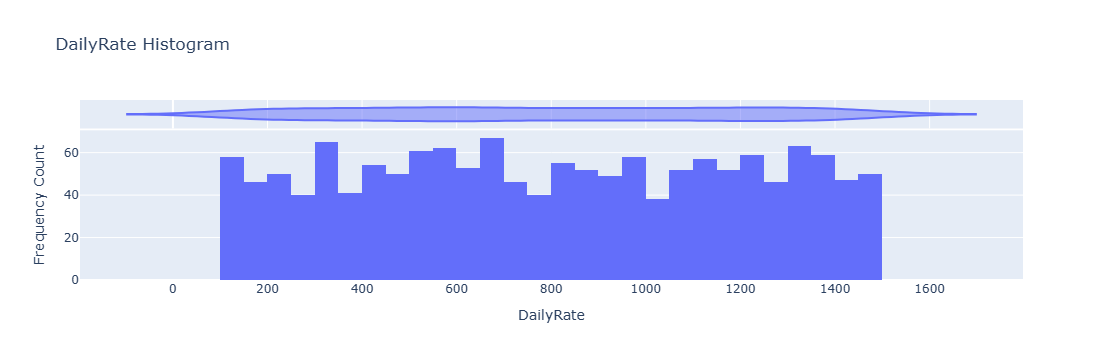

In [71]:
histogram(ibm_processed, "DailyRate")

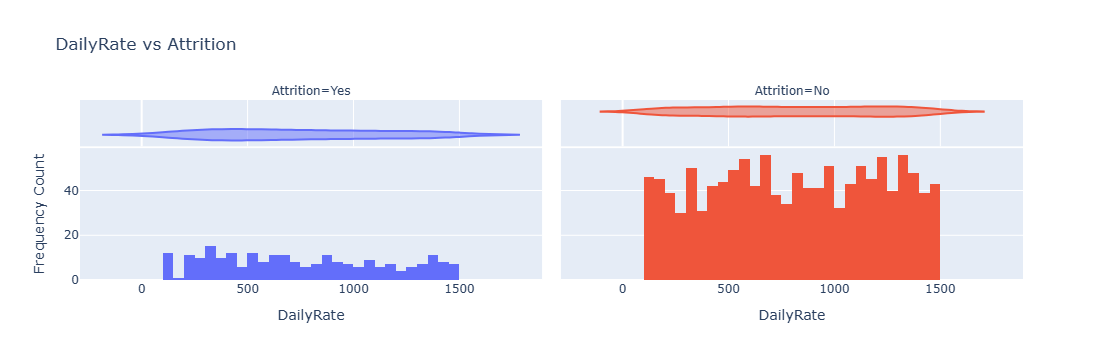

In [72]:
histogram(ibm_hr, "DailyRate", color="Attrition", facet_col="Attrition", showlegend=False)

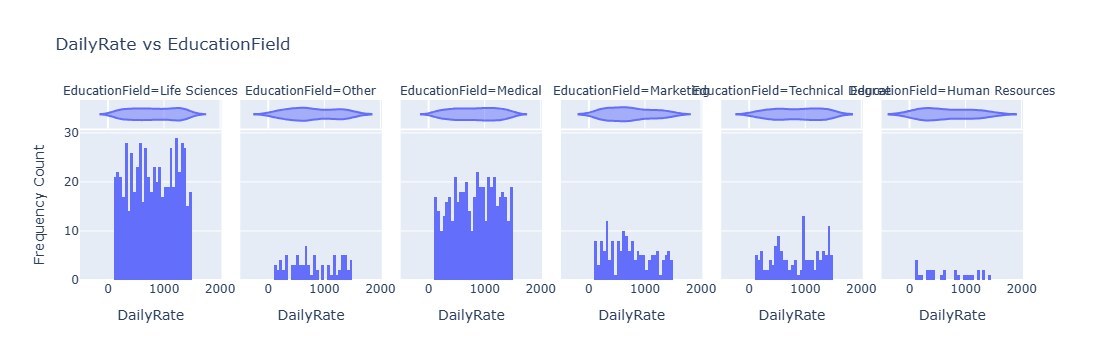

In [73]:
histogram(ibm_hr, "DailyRate", facet_col="EducationField", showlegend=False).show()

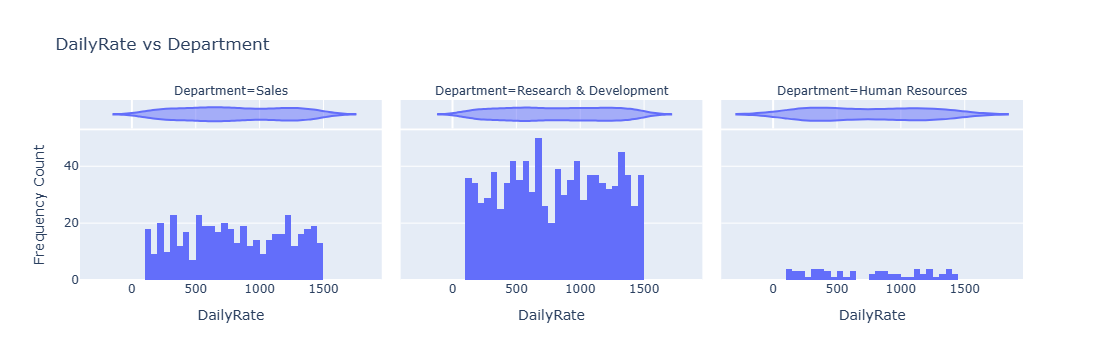

In [74]:
histogram(ibm_hr, "DailyRate", facet_col="Department", showlegend=False)

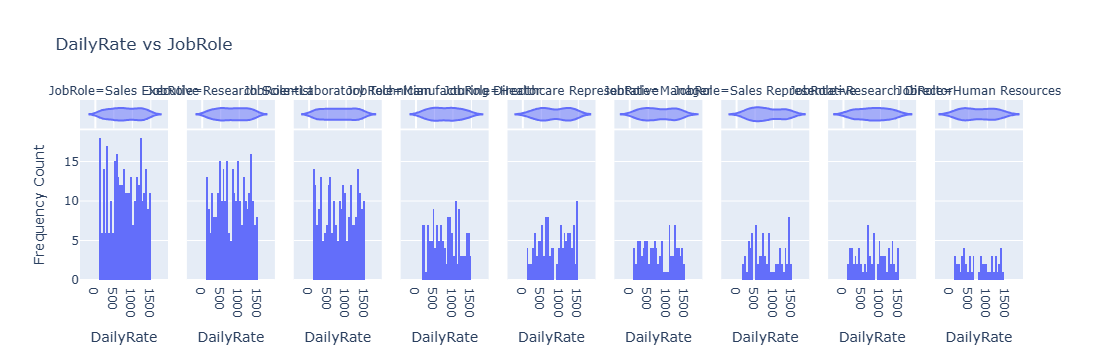

In [75]:
histogram(ibm_hr, "DailyRate", facet_col="JobRole", showlegend=False)

In [76]:
ibm_desc['HourlyRate']

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

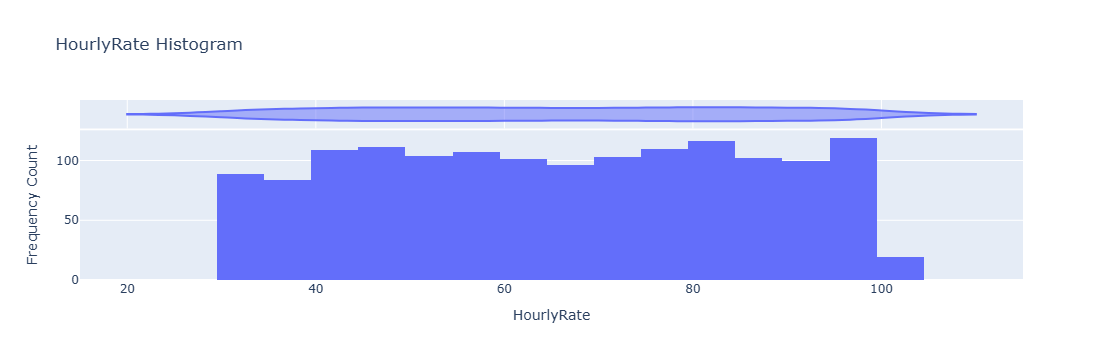

In [77]:
histogram(ibm_hr, "HourlyRate")

In [78]:
ibm_desc['MonthlyIncome']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

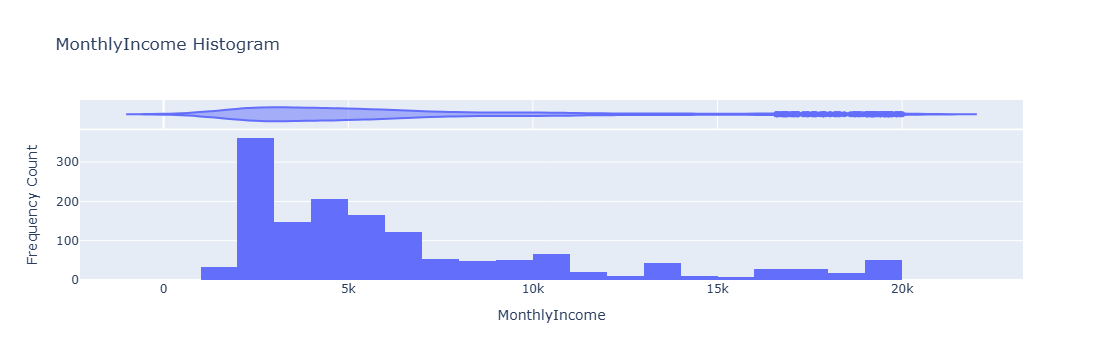

In [79]:
histogram(ibm_hr, "MonthlyIncome")

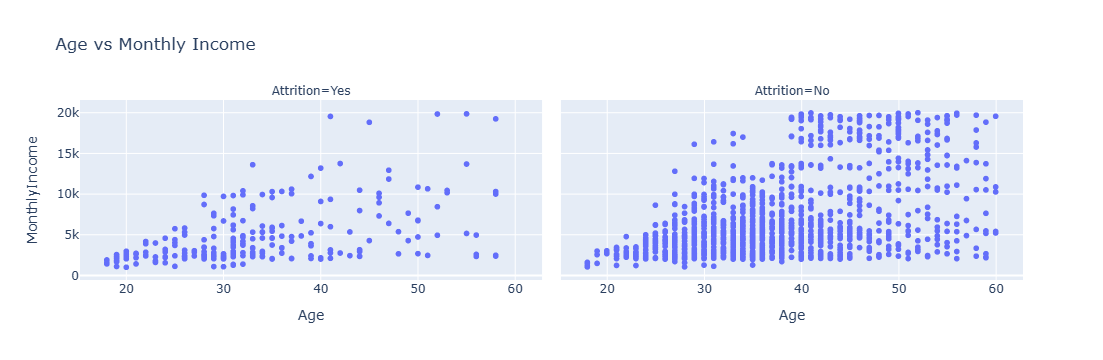

In [80]:
px.scatter(ibm_hr, y="MonthlyIncome", x="Age", title="Age vs Monthly Income", facet_col="Attrition")

In [81]:
ibm_desc['MonthlyRate']

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

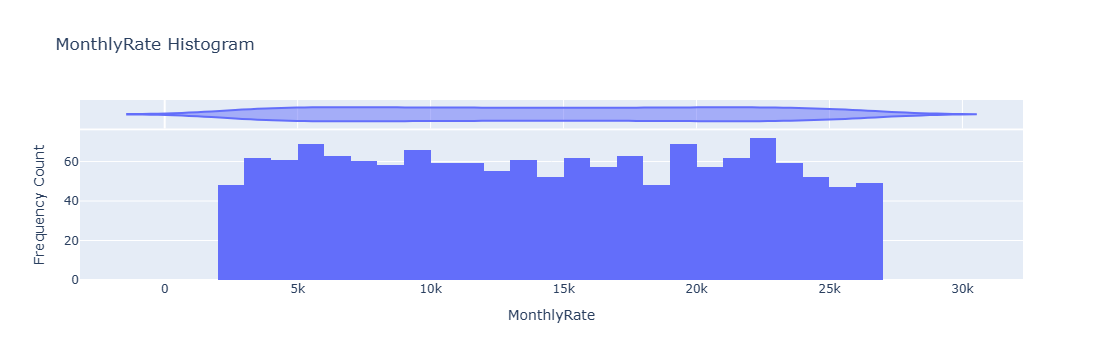

In [95]:
histogram(ibm_hr, "MonthlyRate")

In [96]:
ibm_desc['PercentSalaryHike']

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

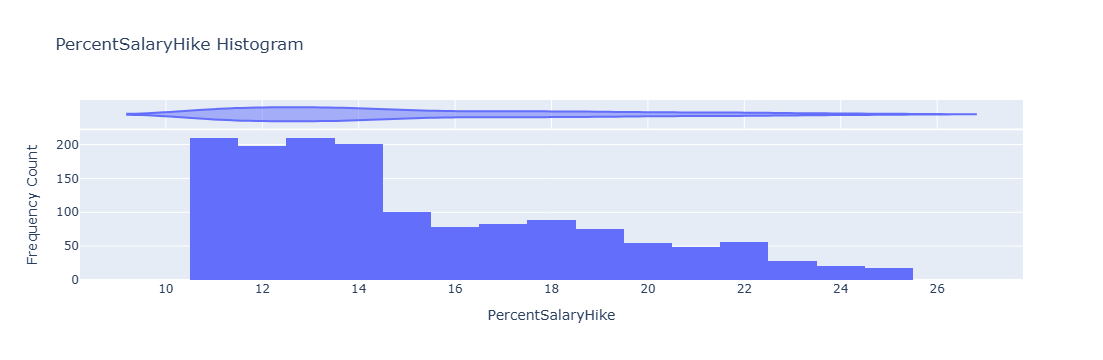

In [97]:
histogram(ibm_hr, "PercentSalaryHike")

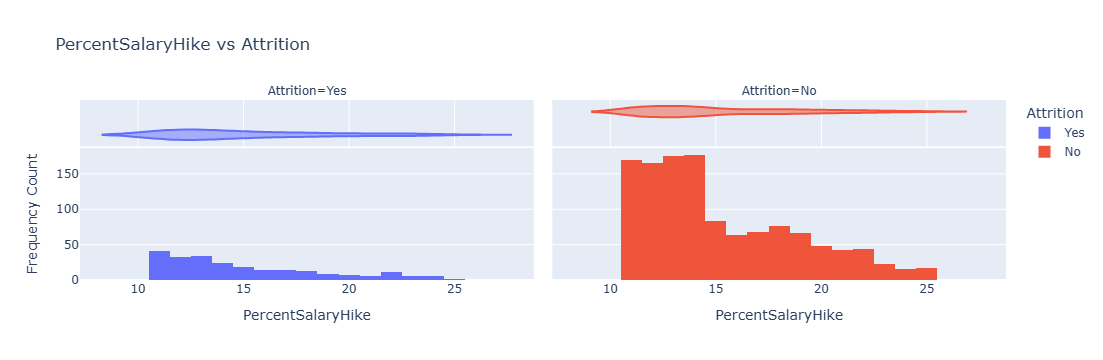

In [98]:
histogram(ibm_hr, "PercentSalaryHike", color="Attrition", facet_col="Attrition")

In [99]:
ibm_desc['TotalWorkingYears']

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

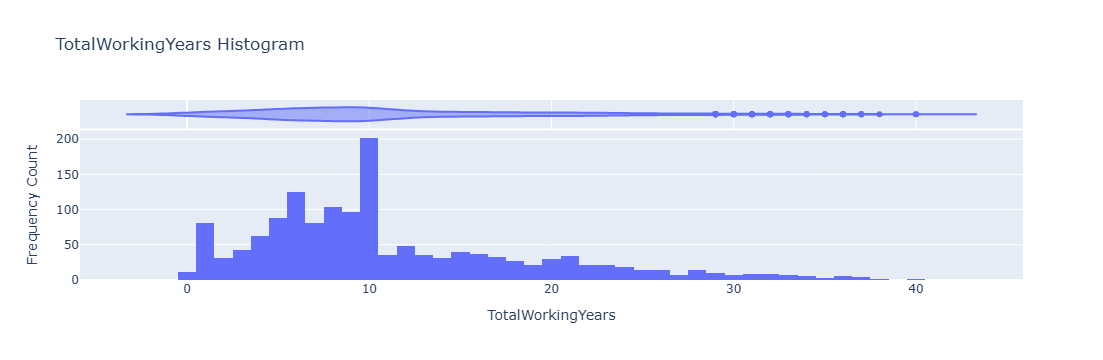

In [100]:
histogram(ibm_hr, "TotalWorkingYears")

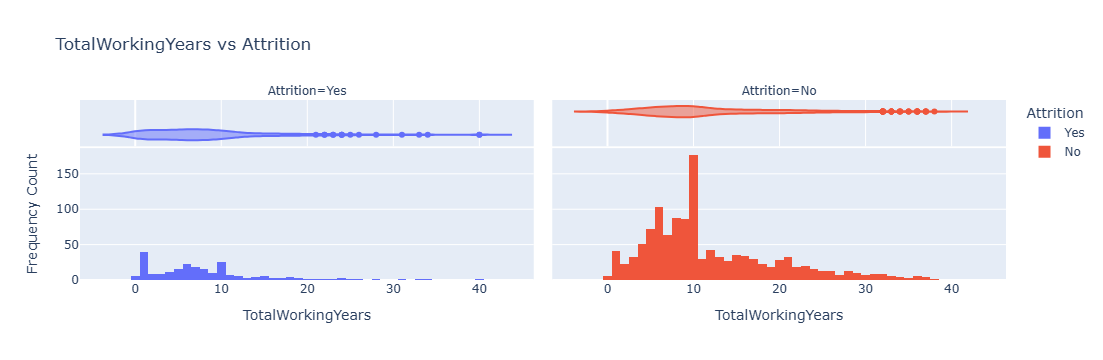

In [101]:
histogram(ibm_hr, "TotalWorkingYears", color="Attrition", facet_col="Attrition")

In [102]:
ibm_desc['YearsAtCompany']

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

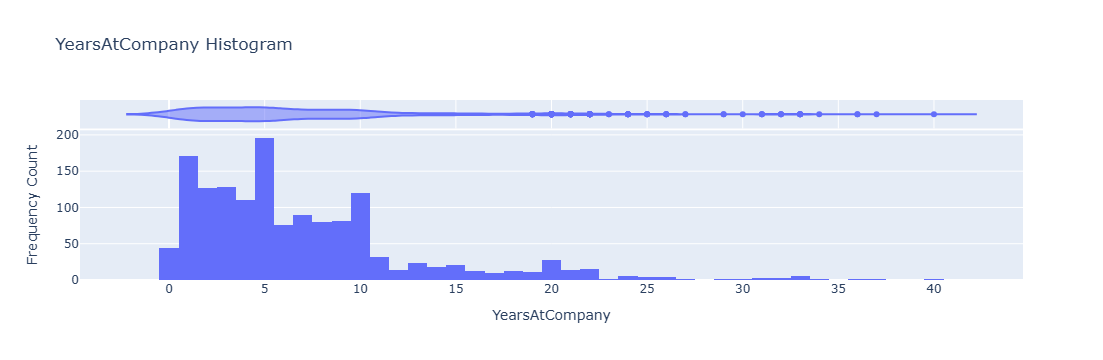

In [103]:
histogram(ibm_hr, "YearsAtCompany")

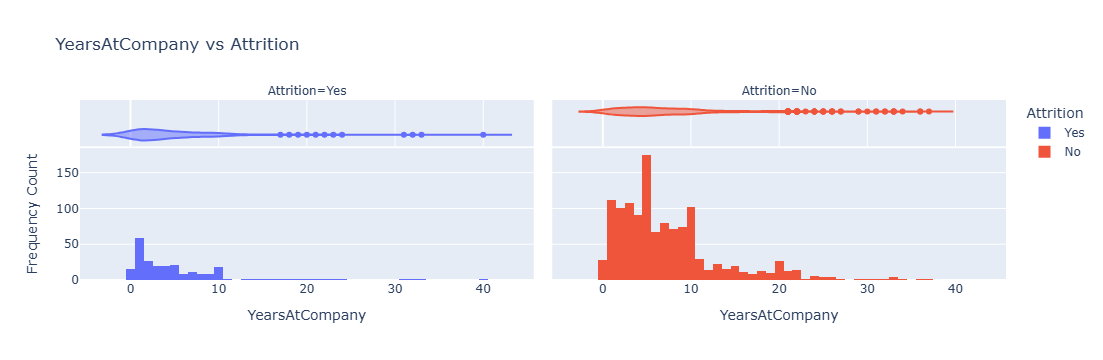

In [104]:
histogram(ibm_hr, "YearsAtCompany", color="Attrition", facet_col="Attrition")

In [105]:
ibm_desc['YearsInCurrentRole']

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

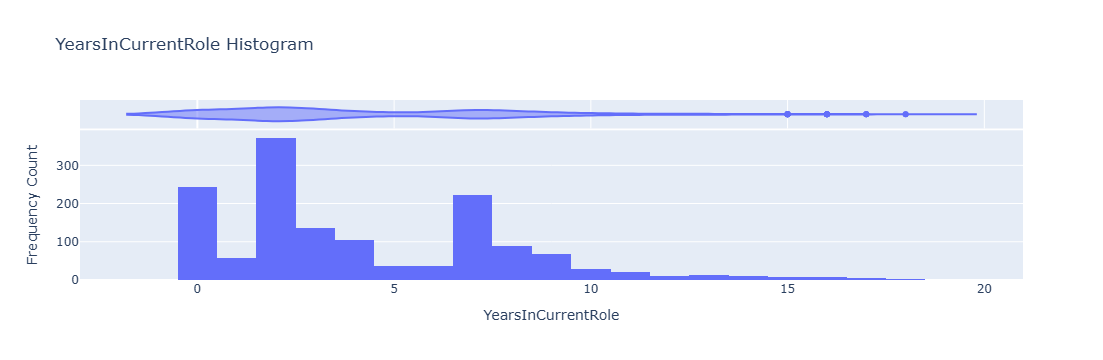

In [106]:
histogram(ibm_hr, "YearsInCurrentRole")

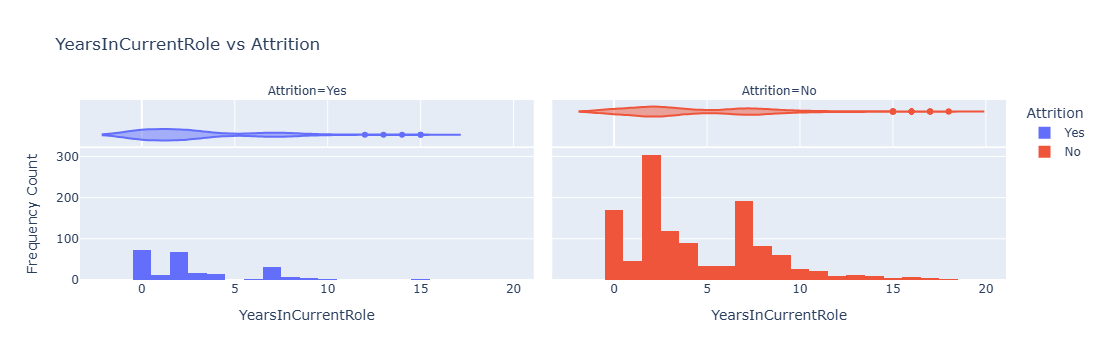

In [107]:
histogram(ibm_hr, "YearsInCurrentRole", color="Attrition", facet_col="Attrition")

In [108]:
ibm_desc['YearsSinceLastPromotion']

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

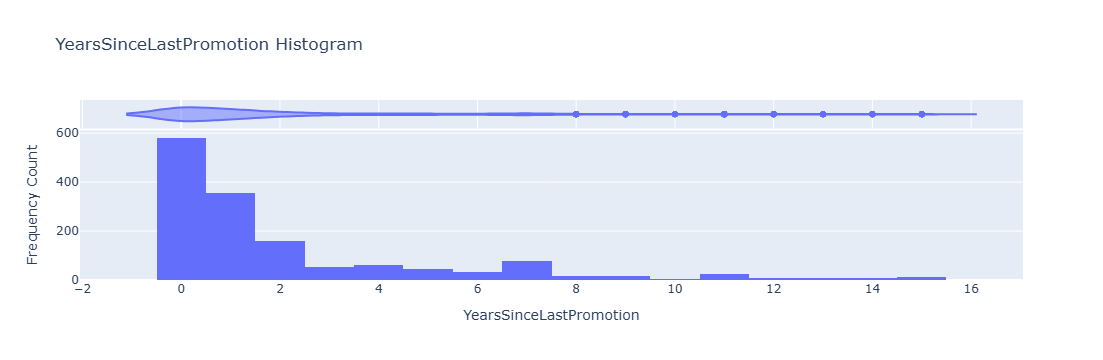

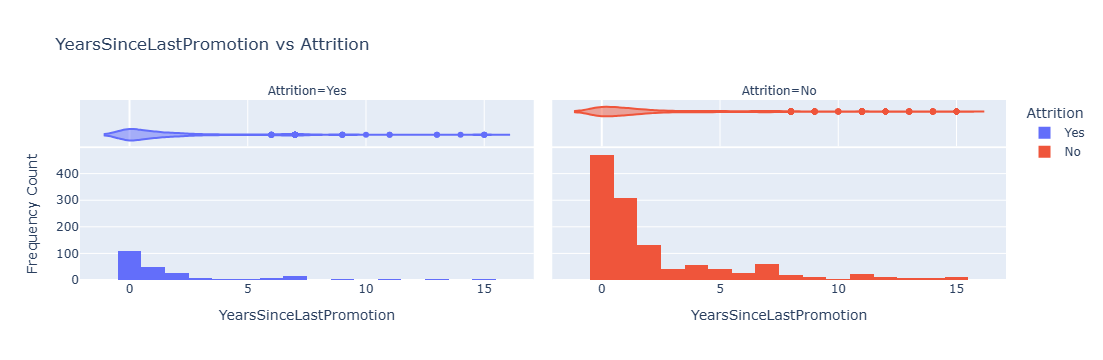

In [109]:
histogram(ibm_hr, "YearsSinceLastPromotion").show()
histogram(ibm_hr, "YearsSinceLastPromotion", color="Attrition", facet_col="Attrition").show()

In [110]:
ibm_desc['YearsWithCurrManager']

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

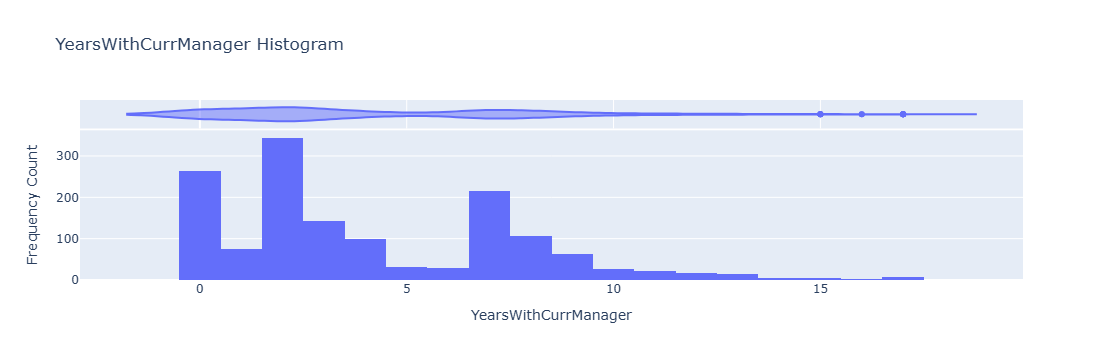

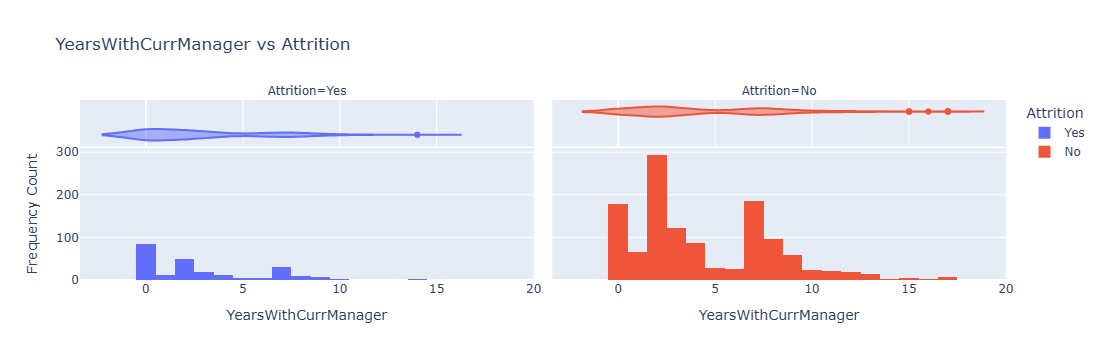

In [111]:
histogram(ibm_hr, "YearsWithCurrManager").show()
histogram(ibm_hr, "YearsWithCurrManager", color="Attrition", facet_col="Attrition").show()

In [112]:
ibm_desc['YearsWithCurrManager']

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

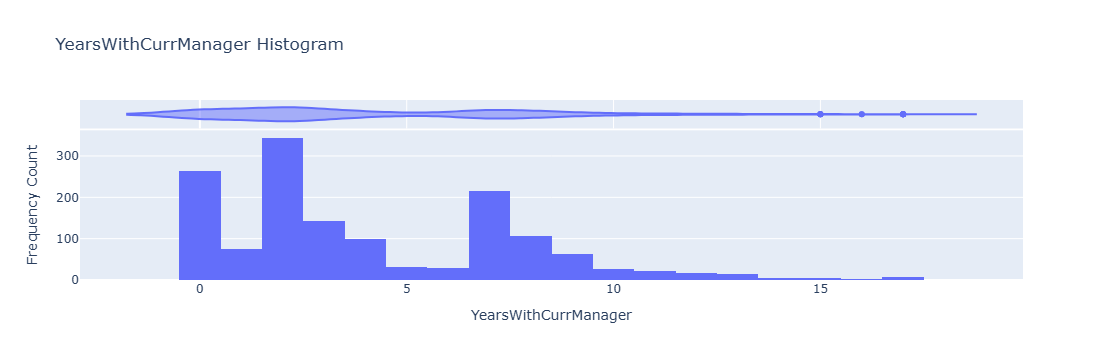

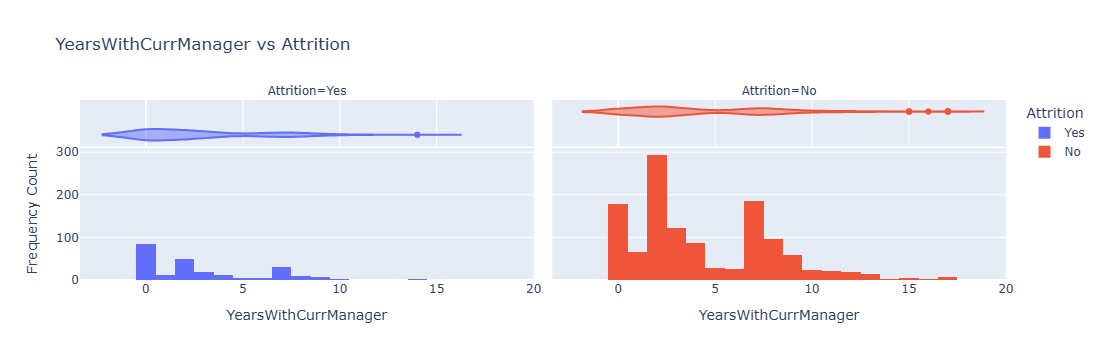

In [113]:
histogram(ibm_hr, "YearsWithCurrManager").show()
histogram(ibm_hr, "YearsWithCurrManager", color="Attrition", facet_col="Attrition").show()

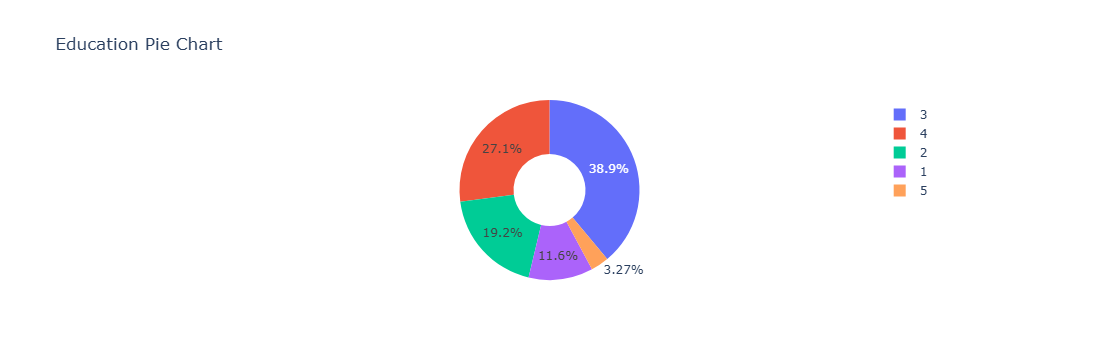

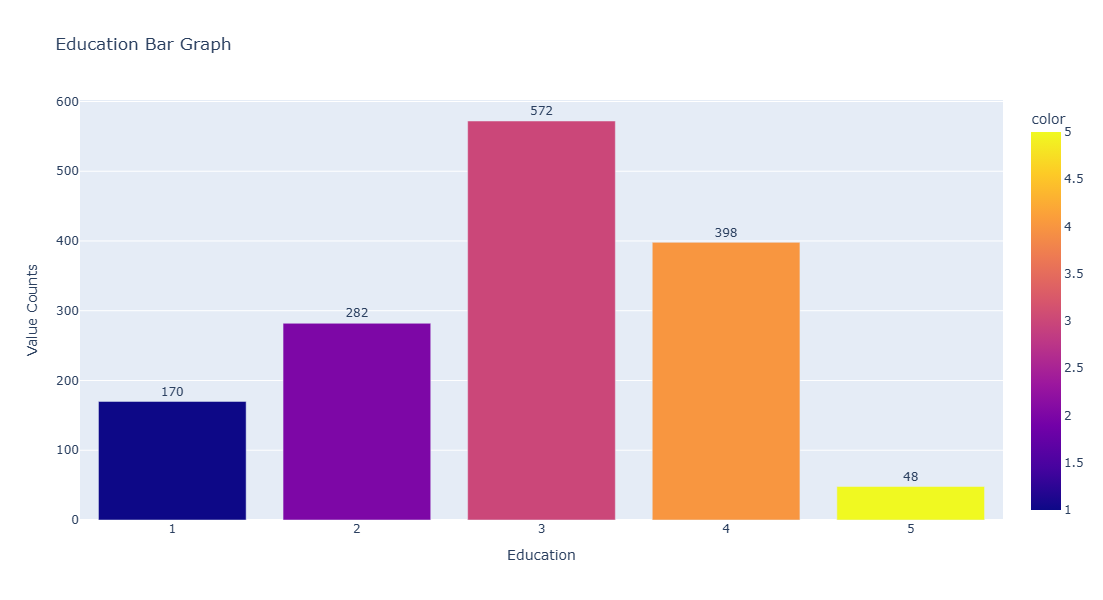

In [114]:
pie(ibm_processed, "Education").show()
bar(ibm_processed, "Education").show()

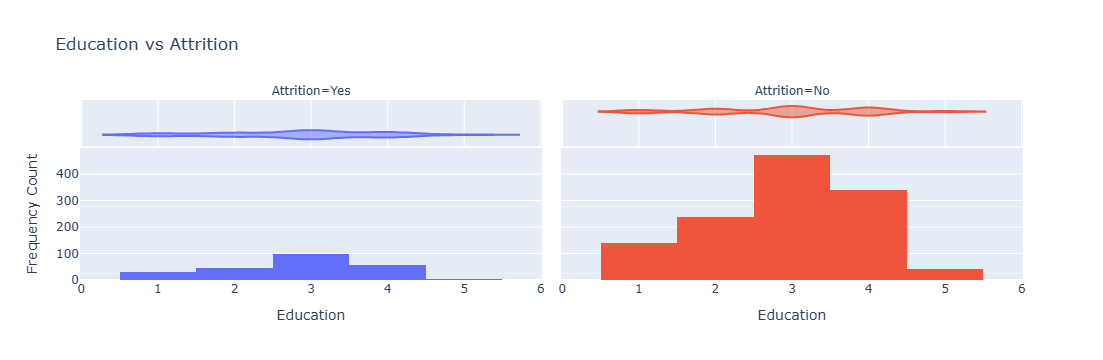

In [115]:
histogram(ibm_hr, "Education", facet_col="Attrition", color="Attrition", showlegend=False)

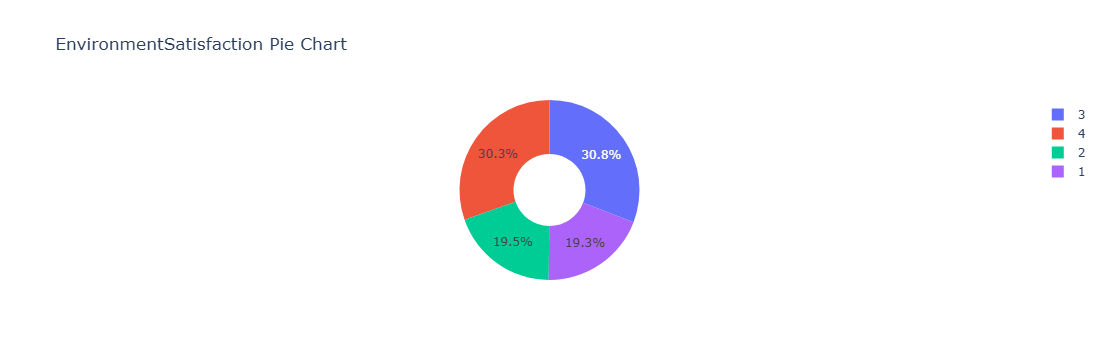

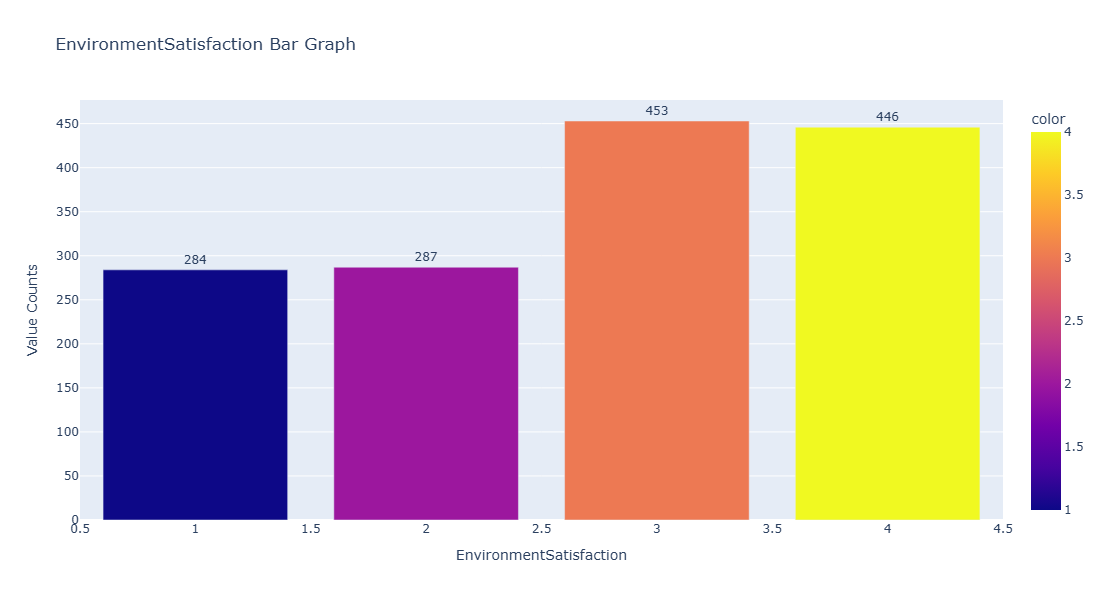

In [117]:
pie(ibm_processed, "EnvironmentSatisfaction").show()
bar(ibm_processed, "EnvironmentSatisfaction").show()

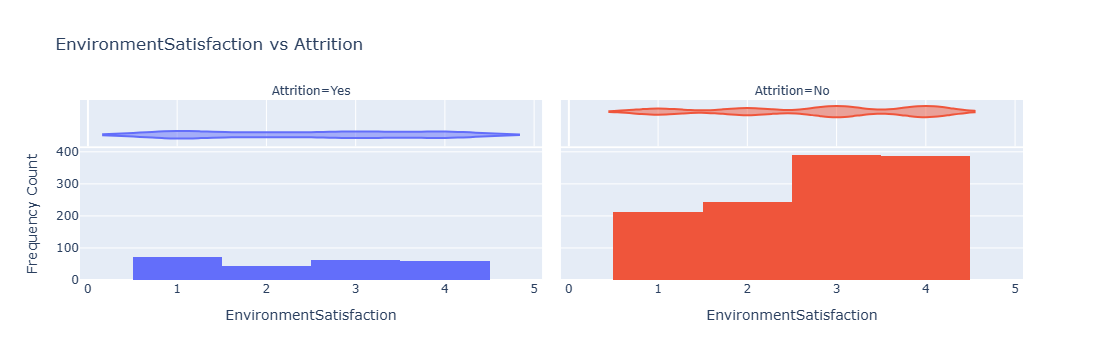

In [118]:
histogram(ibm_hr, "EnvironmentSatisfaction", facet_col="Attrition", color="Attrition", showlegend=False)

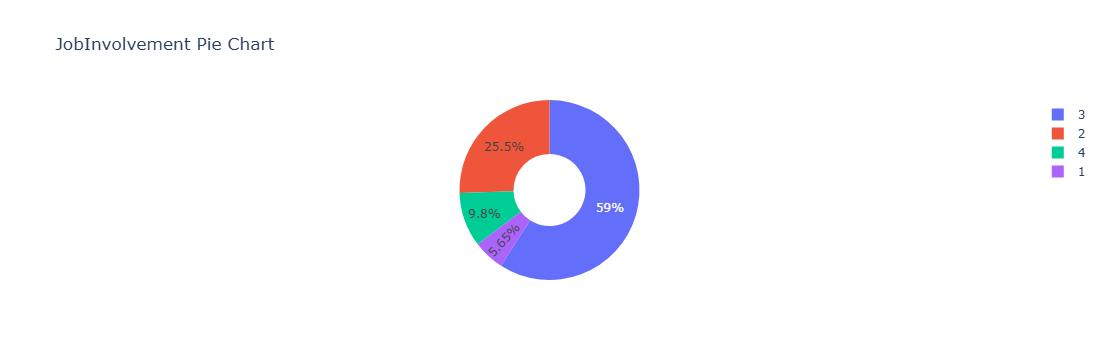

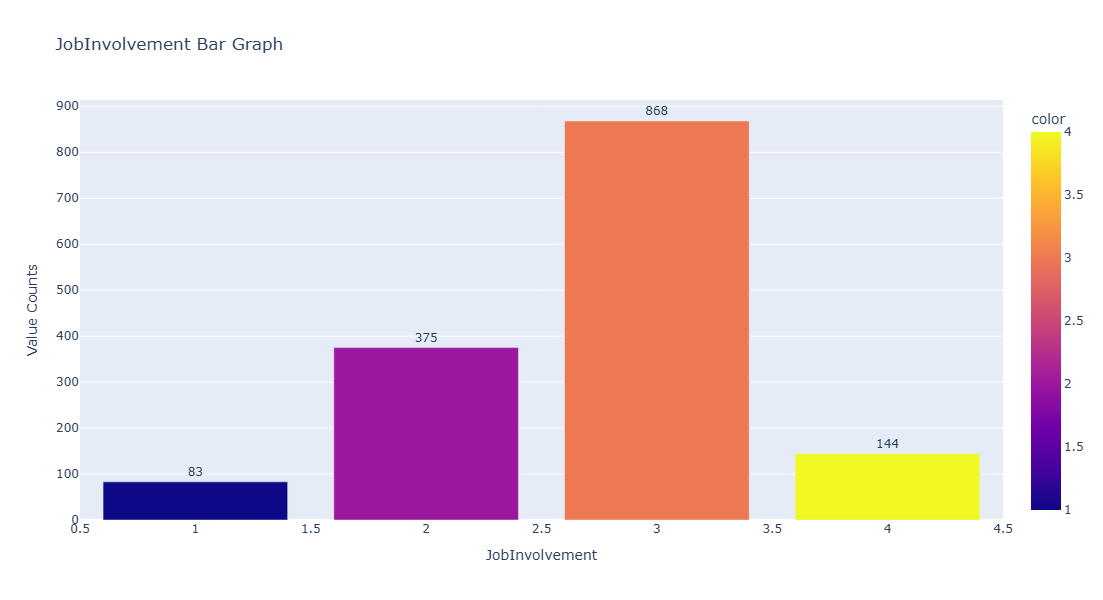

In [119]:
pie(ibm_processed, "JobInvolvement").show()
bar(ibm_processed, "JobInvolvement").show()

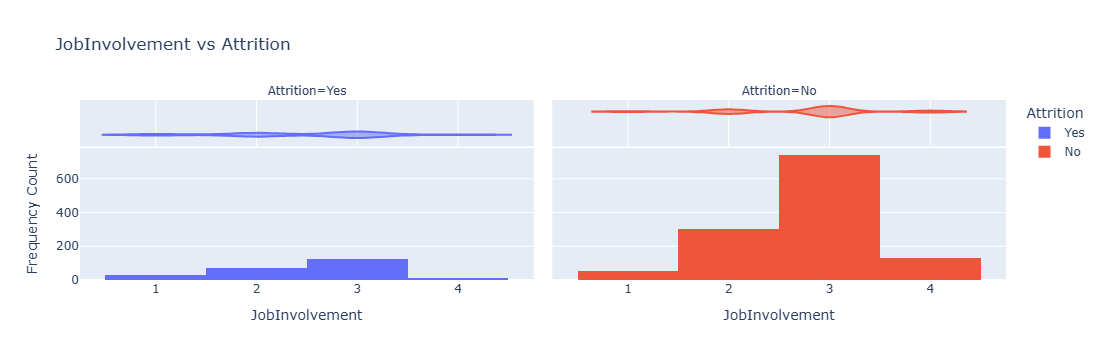

In [120]:
histogram(ibm_hr, "JobInvolvement", facet_col="Attrition", color="Attrition")

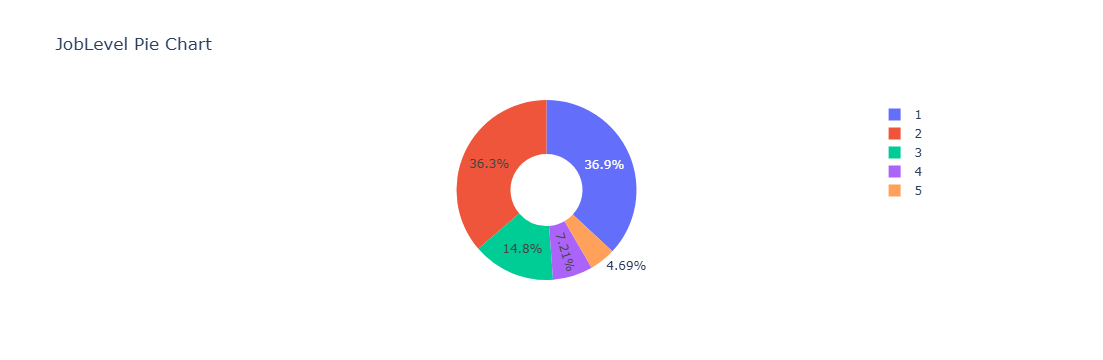

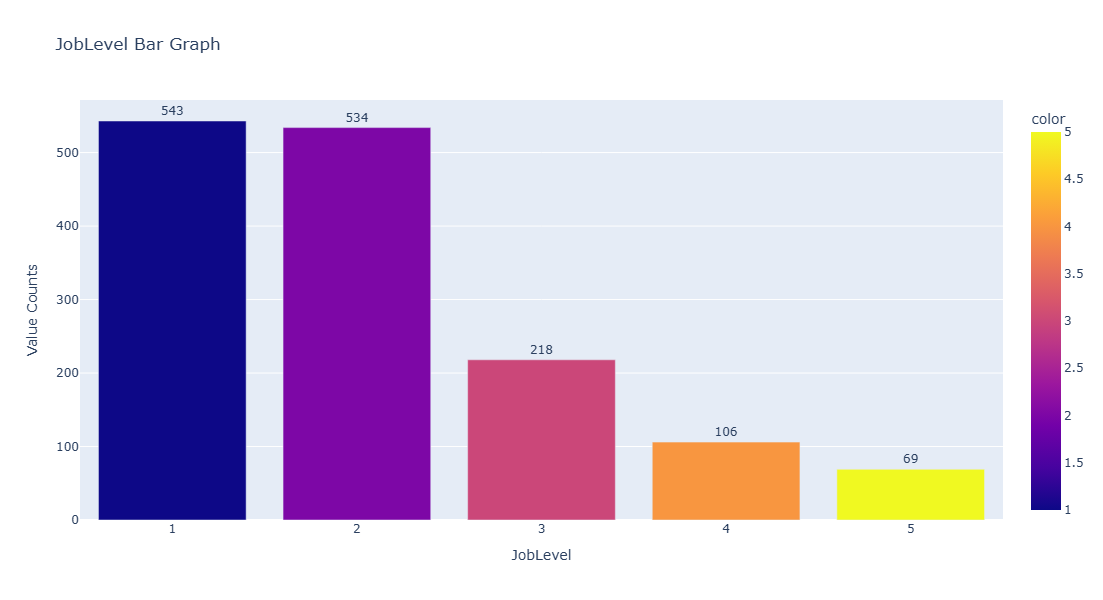

In [121]:
pie(ibm_processed, "JobLevel").show()
bar(ibm_processed, "JobLevel").show()

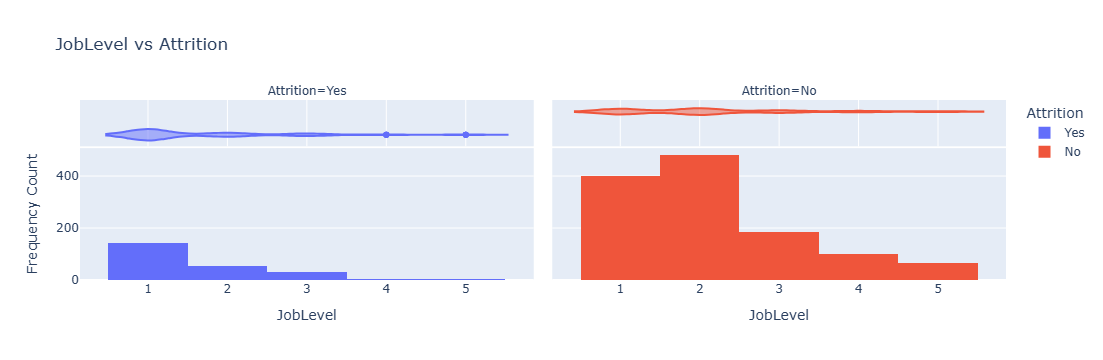

In [122]:
histogram(ibm_hr, "JobLevel", facet_col="Attrition", color="Attrition")


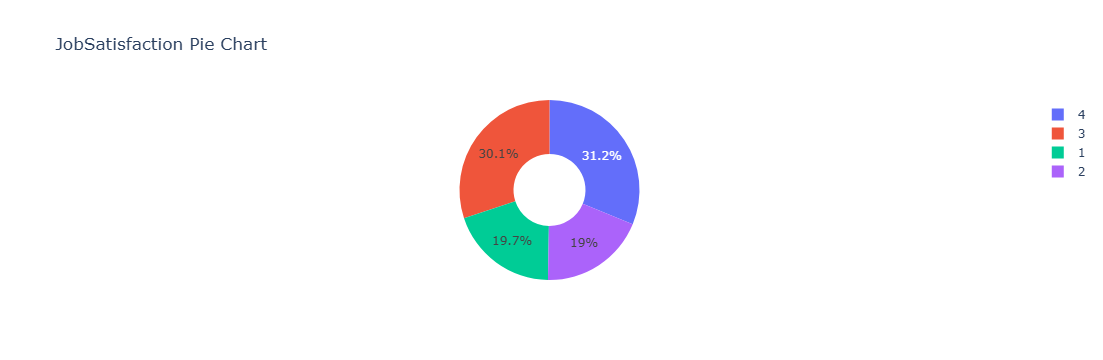

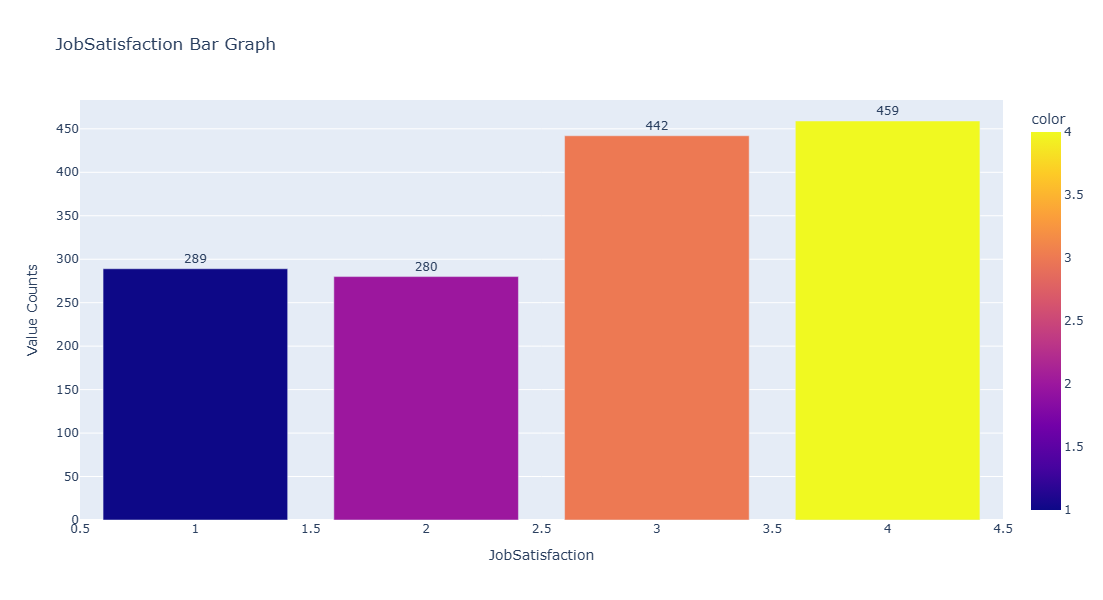

In [123]:
pie(ibm_processed, "JobSatisfaction").show()
bar(ibm_processed, "JobSatisfaction").show()

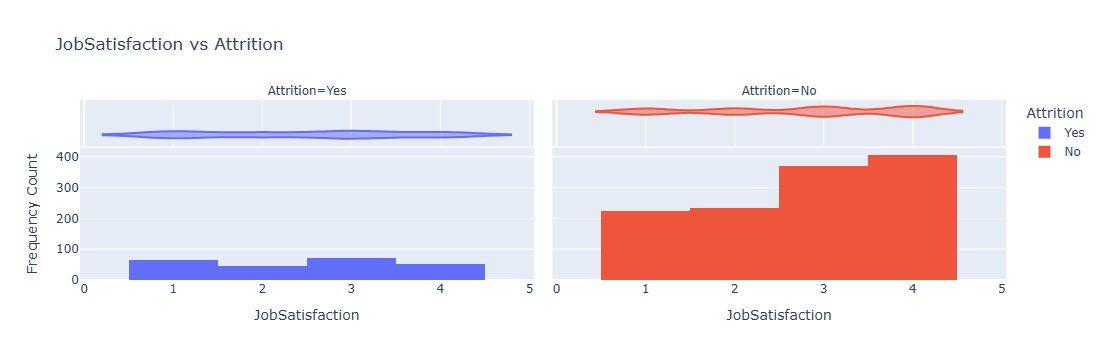

In [124]:
histogram(ibm_hr, "JobSatisfaction", facet_col="Attrition", color="Attrition").show()

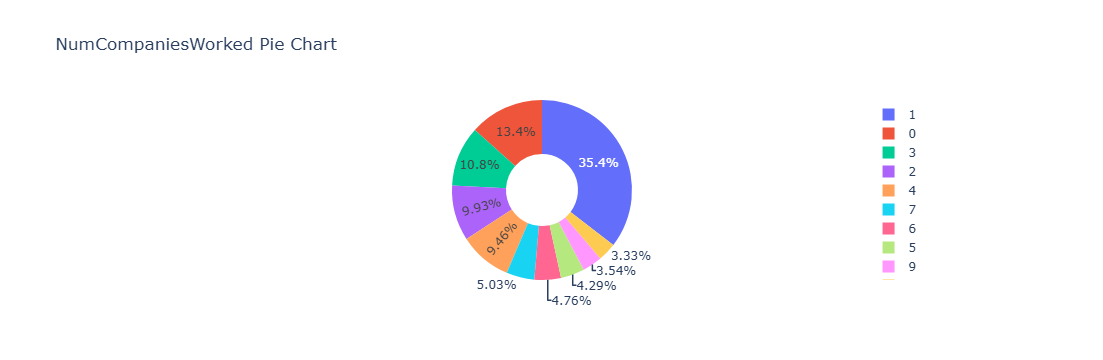

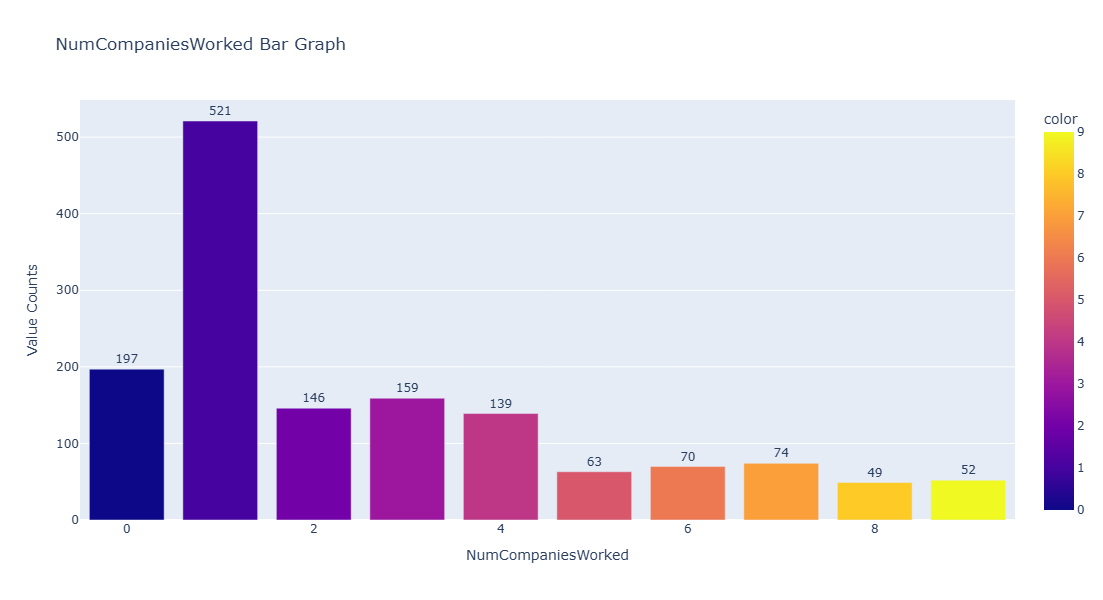

In [125]:
pie(ibm_processed, "NumCompaniesWorked").show()
bar(ibm_processed, "NumCompaniesWorked").show()

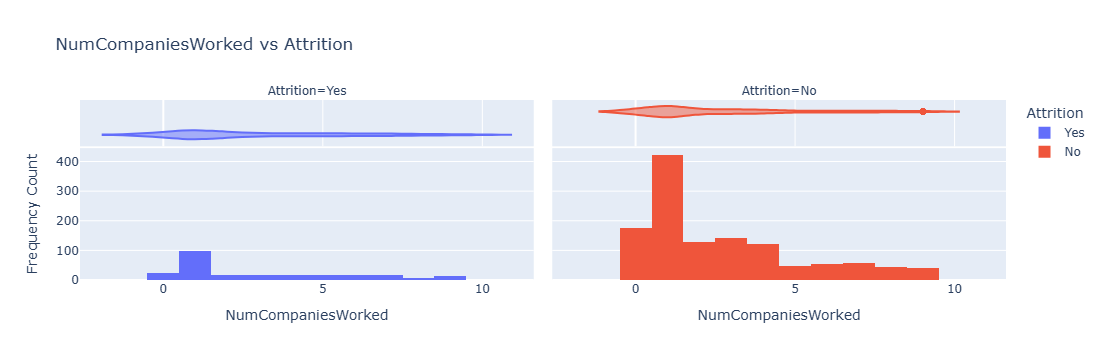

In [126]:
histogram(ibm_hr, "NumCompaniesWorked", facet_col="Attrition", color="Attrition").show()

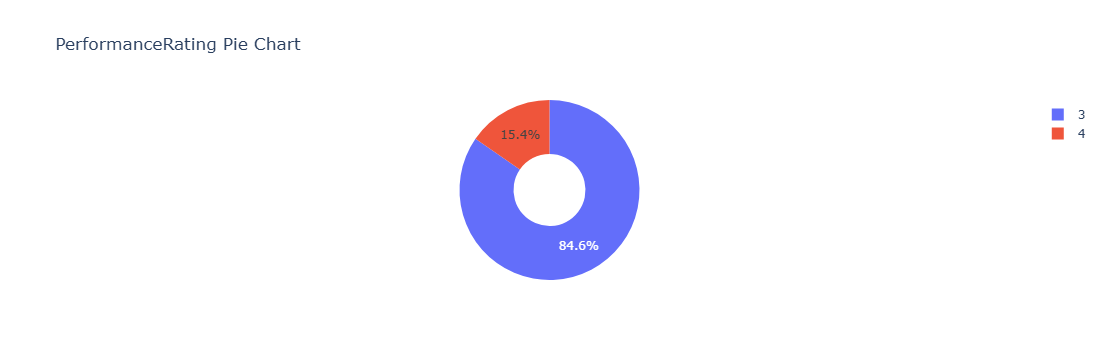

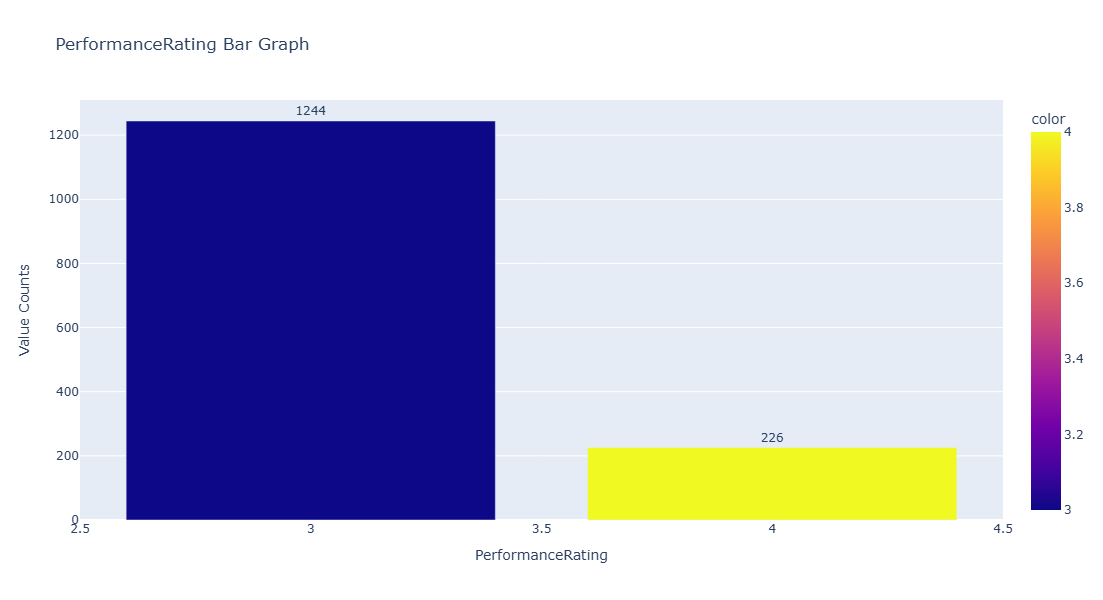

In [127]:
pie(ibm_processed, "PerformanceRating").show()
bar(ibm_processed, "PerformanceRating").show()

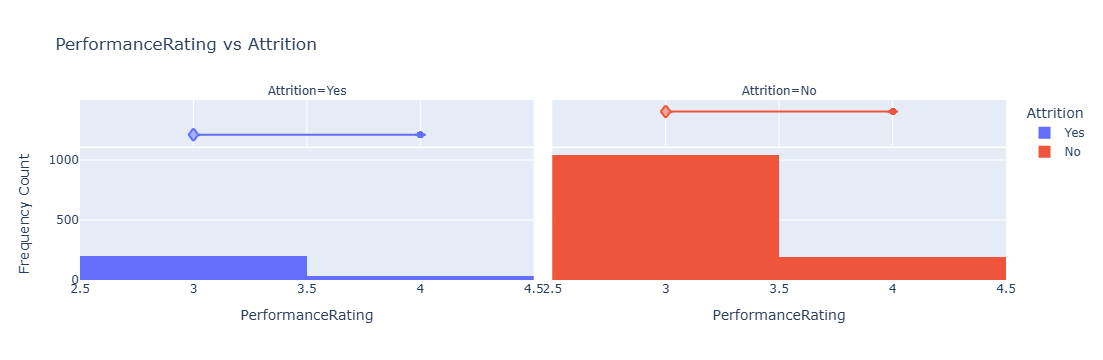

In [128]:
histogram(ibm_hr, "PerformanceRating", facet_col="Attrition", color="Attrition").show()

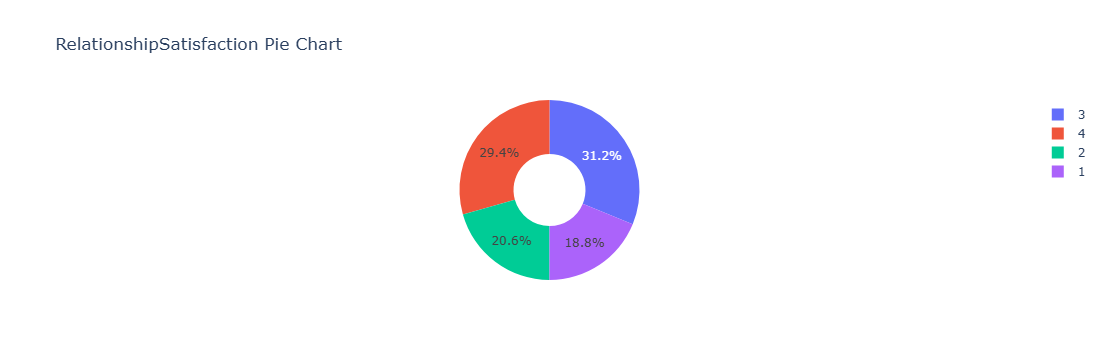

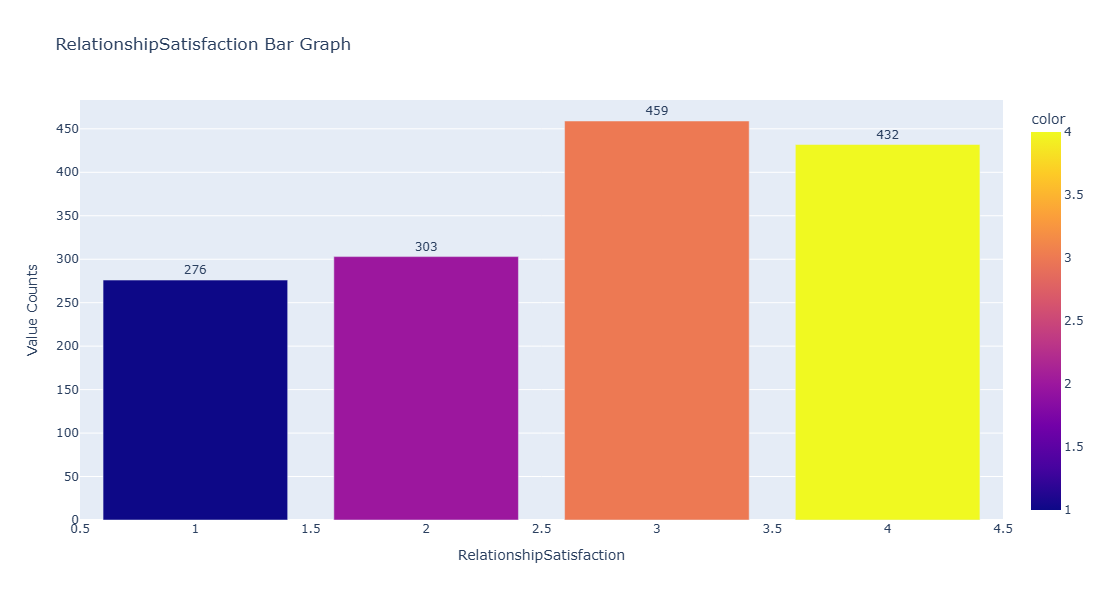

In [129]:
pie(ibm_processed, "RelationshipSatisfaction").show()
bar(ibm_processed, "RelationshipSatisfaction").show()

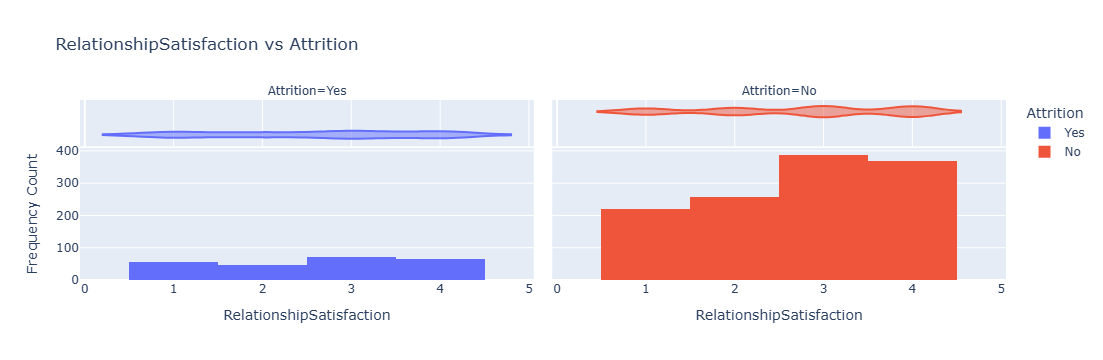

In [130]:
histogram(ibm_hr, "RelationshipSatisfaction", facet_col="Attrition", color="Attrition").show()

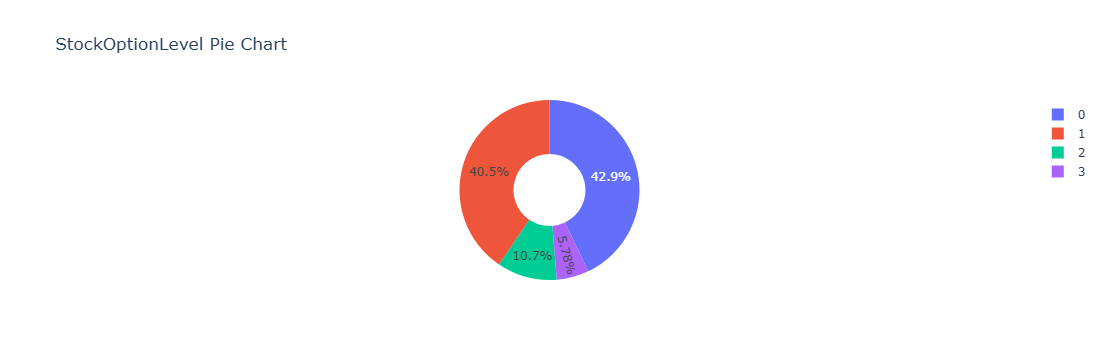

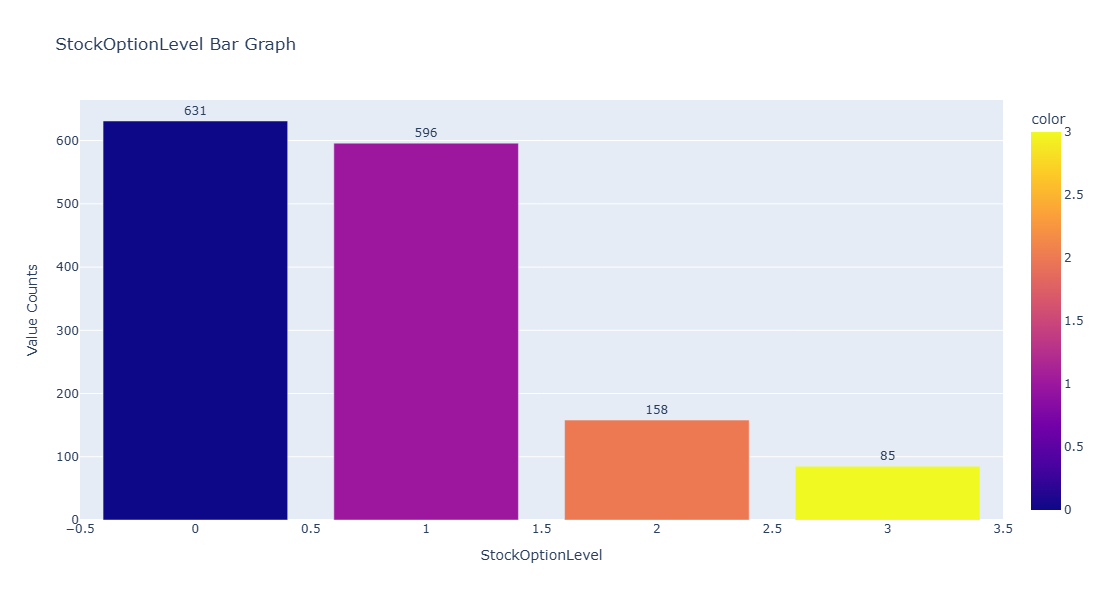

In [131]:
pie(ibm_processed, "StockOptionLevel").show()
bar(ibm_processed, "StockOptionLevel").show()

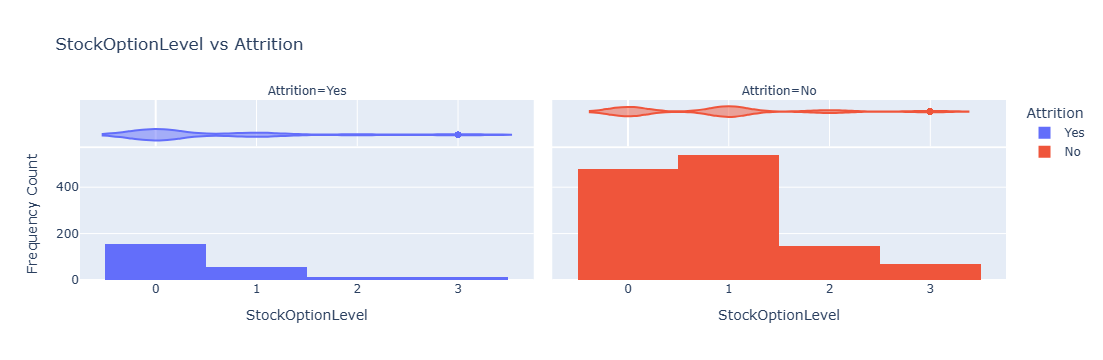

In [132]:
histogram(ibm_hr, "StockOptionLevel", facet_col="Attrition", color="Attrition").show()

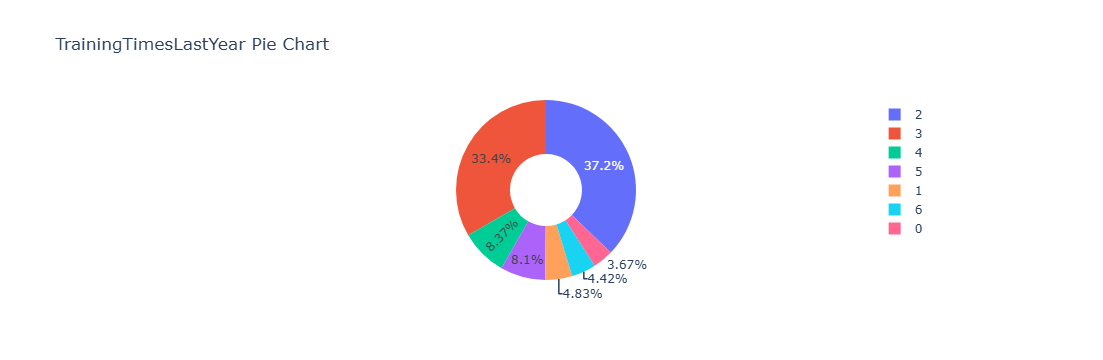

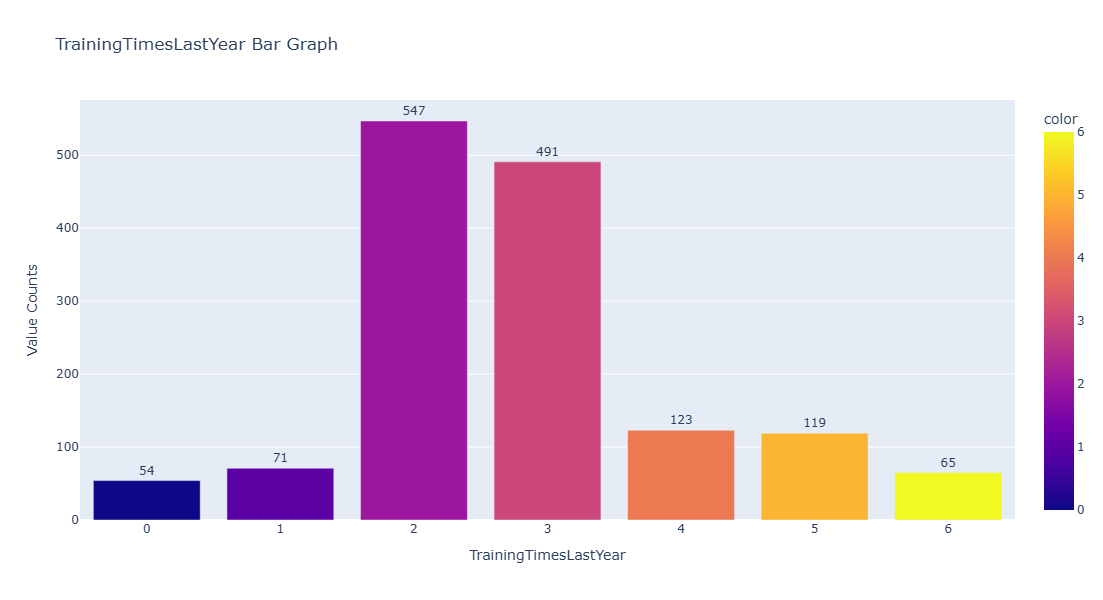

In [133]:
pie(ibm_processed, "TrainingTimesLastYear").show()
bar(ibm_processed, "TrainingTimesLastYear").show()

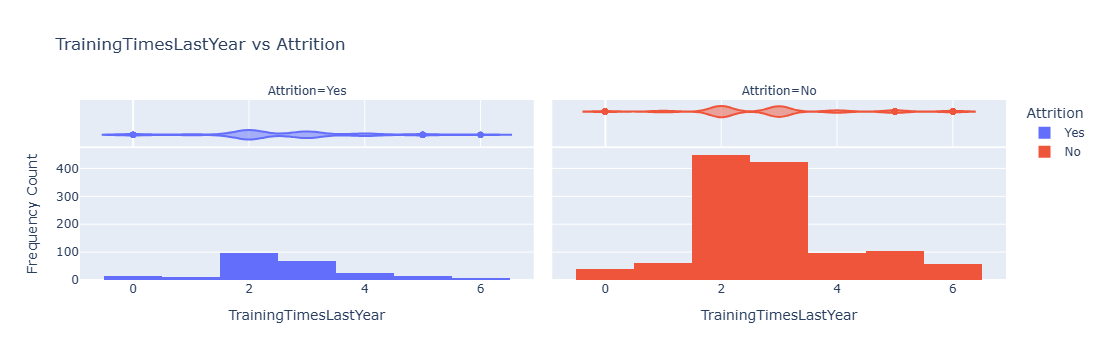

In [134]:
histogram(ibm_hr, "TrainingTimesLastYear", facet_col="Attrition", color="Attrition").show()

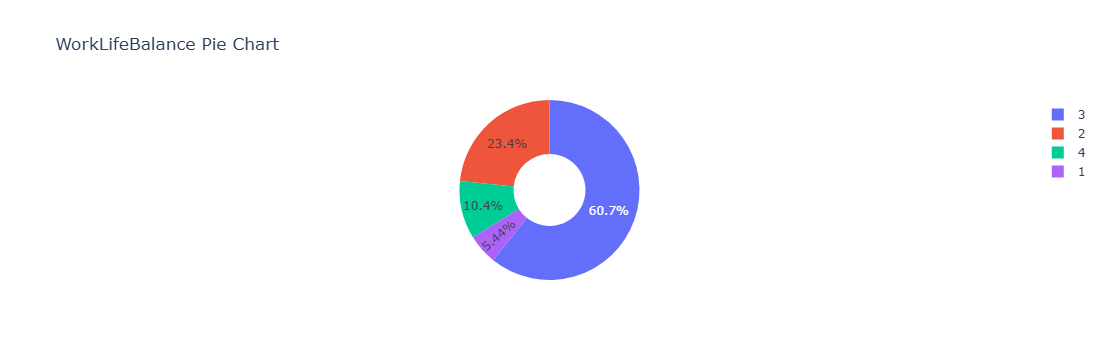

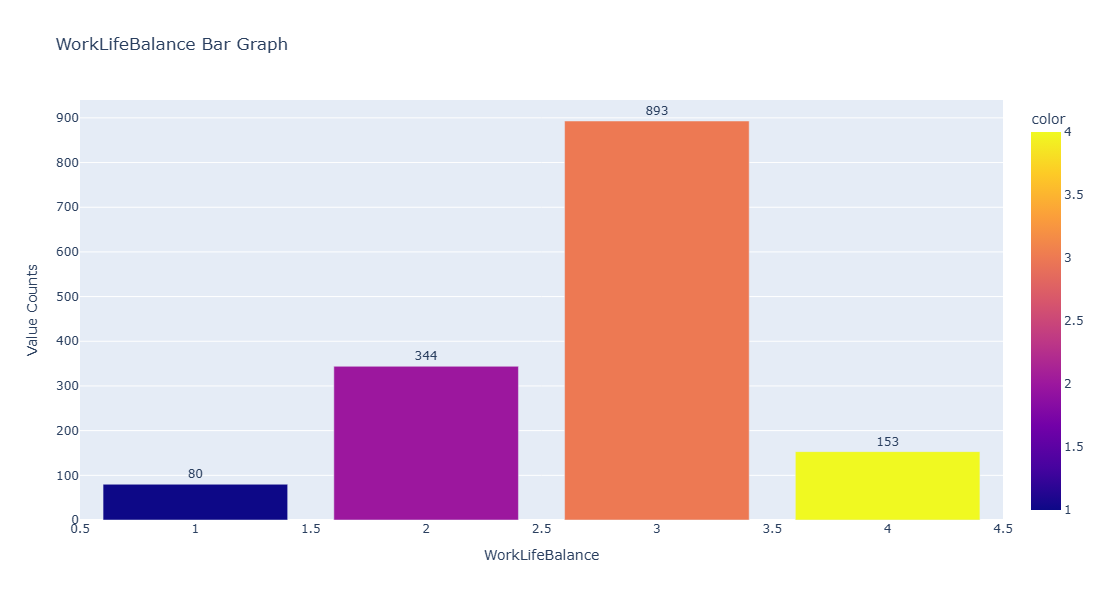

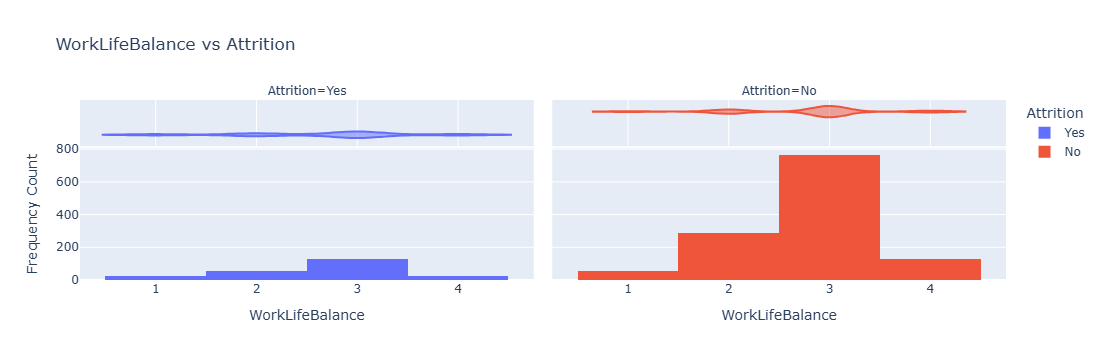

In [135]:
pie(ibm_processed, "WorkLifeBalance").show()
bar(ibm_processed, "WorkLifeBalance").show()
histogram(ibm_hr, "WorkLifeBalance", facet_col="Attrition", color="Attrition").show()